# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a NN that depend on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [3]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

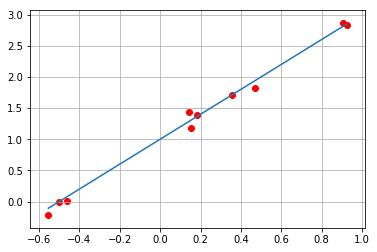

In [4]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [5]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 100 samples, validate on 10 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 0s 2ms/sample - loss: 1.1772 - mean_squared_error: 1.1772 - val_loss: 1.3199 - val_mean_squared_error: 1.3199
Epoch 2/30
100/100 [==============================] - 0s 57us/sample - loss: 1.0341 - mean_squared_error: 1.0341 - val_loss: 1.1462 - val_mean_squared_error: 1.1462
Epoch 3/30
100/100 [==============================] - 0s 53us/sample - loss: 0.8977 - mean_squared_error: 0.8977 - val_loss: 1.0128 - val_mean_squared_error: 1.0128
Epoch 4/30
100/100 [==============================] - 0s 59us/sample - loss: 0.7923 - mean_squared_error: 0.7923 - val_loss: 0.8871 - val_mean_squared_error: 0.8871
Epoch 5/30
100/100 [==============================] - 0s 57us/sample - loss: 0.6949 - mean_squared_error: 0.6949 - val_loss: 0.7972 - val_mean_squared_error: 0.7972
Epoch 6/30
100/100 [==============================] - 0s 64us/sample - loss: 0.6244

In [7]:
# return weights
model.get_weights()

[array([[1.597378]], dtype=float32), array([0.89442176], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 80us/sample - loss: 0.0806 - mean_squared_error: 0.0806

Test loss: 0.08058740198612213
Test accuracy: 0.0805874


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 92us/sample - loss: 0.0715 - mean_squared_error: 0.0715

Test loss: 0.07146252691745758
Test accuracy: 0.07146253


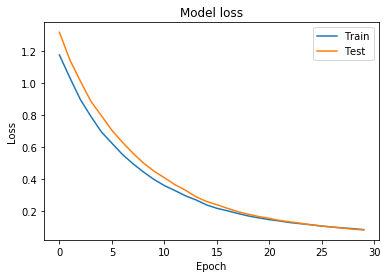

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

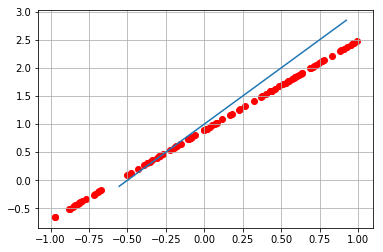

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

We may start first of all by increasing the size of the dataset on wich we train our NN.

In [6]:
#generate four distinct sets of data

np.random.seed(0)
x_train1 = np.random.uniform(-1, 1, 100)
x_train2 = np.random.uniform(-1, 1, 300)
x_train3 = np.random.uniform(-1, 1, 900)
x_train4 = np.random.uniform(-1, 1, 2700)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for now we will leave the same noise on every set
y_train1 = np.random.normal(m * x_train1 + b, sigma)
y_train2 = np.random.normal(m * x_train2 + b, sigma)
y_train3 = np.random.normal(m * x_train3 + b, sigma)
y_train4 = np.random.normal(m * x_train4 + b, sigma)
# actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [26]:
#generate four distinct models for the independent trainings
#since we are intrested only in enlarging the size of the training dataset, the models will be identical copies


model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model3 = tf.keras.Sequential()
model3.add(Dense(1, input_shape=(1,)))
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model4 = tf.keras.Sequential()
model4.add(Dense(1, input_shape=(1,)))
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model1.summary()
model2.summary()
model3.summary()
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
____________________________

In [27]:
#train each model in the same way with different dataset

train100 = model1.fit(x=x_train1, y=y_train1, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


train300 = model2.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

train900 = model3.fit(x=x_train3, y=y_train3, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

train2700 = model4.fit(x=x_train4, y=y_train4, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 100 samples, validate on 10 samples
Epoch 1/30
100/100 [==============================] - 0s 2ms/sample - loss: 5.1083 - mean_squared_error: 5.1083 - val_loss: 4.0119 - val_mean_squared_error: 4.0119
Epoch 2/30
100/100 [==============================] - 0s 55us/sample - loss: 4.8454 - mean_squared_error: 4.8454 - val_loss: 3.8066 - val_mean_squared_error: 3.8066
Epoch 3/30
100/100 [==============================] - 0s 52us/sample - loss: 4.5672 - mean_squared_error: 4.5672 - val_loss: 3.6337 - val_mean_squared_error: 3.6337
Epoch 4/30
100/100 [==============================] - 0s 57us/sample - loss: 4.3332 - mean_squared_error: 4.3332 - val_loss: 3.4352 - val_mean_squared_error: 3.4352
Epoch 5/30
100/100 [==============================] - 0s 74us/sample - loss: 4.0767 - mean_squared_error: 4.0767 - val_loss: 3.2458 - val_mean_squared_error: 3.2458
Epoch 6/30
100/100 [==============================] - 0s 67us/sample - loss: 3.8391 - mean_squared_error: 3.8391 - val_loss: 3.0984

Epoch 20/30
300/300 [==============================] - 0s 35us/sample - loss: 0.1507 - mean_squared_error: 0.1507 - val_loss: 0.1525 - val_mean_squared_error: 0.1525
Epoch 21/30
300/300 [==============================] - 0s 34us/sample - loss: 0.1336 - mean_squared_error: 0.1336 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 22/30
300/300 [==============================] - 0s 32us/sample - loss: 0.1180 - mean_squared_error: 0.1180 - val_loss: 0.1224 - val_mean_squared_error: 0.1224
Epoch 23/30
300/300 [==============================] - 0s 38us/sample - loss: 0.1048 - mean_squared_error: 0.1048 - val_loss: 0.1093 - val_mean_squared_error: 0.1093
Epoch 24/30
300/300 [==============================] - 0s 37us/sample - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.0982 - val_mean_squared_error: 0.0982
Epoch 25/30
300/300 [==============================] - 0s 33us/sample - loss: 0.0828 - mean_squared_error: 0.0828 - val_loss: 0.0877 - val_mean_squared_error: 0.0877
Epoc

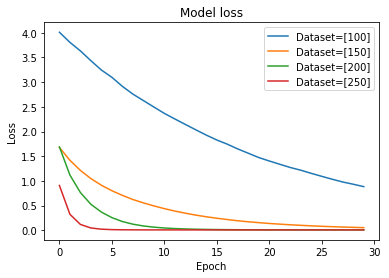

In [28]:
import matplotlib.pyplot as plt

plt.plot(train100.history['val_loss'])
plt.plot(train300.history['val_loss'])
plt.plot(train900.history['val_loss'])
plt.plot(train2700.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Dataset=[100]', 'Dataset=[150]','Dataset=[200]','Dataset=[250]'], loc='best')
plt.show()


We clearly see that the learning process get's faster when the dataset is larger. The "fastness" of the learning process is deducted euristically from the slope of the Loss over the Epoch.


Now we may try to vary the noise on our training dataset

In [39]:
#generate four distinct sets of data

np.random.seed(0)
x_train1 = np.random.uniform(-1, 1, 300)
x_train2 = np.random.uniform(-1, 1, 300)
x_train3 = np.random.uniform(-1, 1, 300)
x_train4 = np.random.uniform(-1, 1, 300)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.01 # noise standard deviation
y_train1 = m * x_train1 + b
y_train2 = np.random.normal(m * x_train2 + b, 10* sigma)
y_train3 = np.random.normal(m * x_train3 + b, 40 *sigma)
y_train4 = np.random.normal(m * x_train4 + b, 80 *sigma)
# actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [40]:
model5 = tf.keras.Sequential()
model5.add(Dense(1, input_shape=(1,)))
model5.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model6 = tf.keras.Sequential()
model6.add(Dense(1, input_shape=(1,)))
model6.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model7 = tf.keras.Sequential()
model7.add(Dense(1, input_shape=(1,)))
model7.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model8 = tf.keras.Sequential()
model8.add(Dense(1, input_shape=(1,)))
model8.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model5.summary()
model6.summary()
model7.summary()
model8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
____________________________

In [41]:
sigma1 = model5.fit(x=x_train1, y=y_train1, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))


sigma2 = model6.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_valid, y_valid))

sigma3 = model7.fit(x=x_train3, y=y_train3, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_valid, y_valid))

sigma4 = model8.fit(x=x_train4, y=y_train4, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Train on 300 samples, validate on 10 samples
Epoch 1/30
300/300 [==============================] - 0s 792us/sample - loss: 1.3167 - mean_squared_error: 1.3167 - val_loss: 1.5830 - val_mean_squared_error: 1.5830
Epoch 2/30
300/300 [==============================] - 0s 32us/sample - loss: 0.9719 - mean_squared_error: 0.9719 - val_loss: 1.1899 - val_mean_squared_error: 1.1899
Epoch 3/30
300/300 [==============================] - 0s 35us/sample - loss: 0.7285 - mean_squared_error: 0.7285 - val_loss: 0.9094 - val_mean_squared_error: 0.9094
Epoch 4/30
300/300 [==============================] - 0s 41us/sample - loss: 0.5578 - mean_squared_error: 0.5578 - val_loss: 0.7094 - val_mean_squared_error: 0.7094
Epoch 5/30
300/300 [==============================] - 0s 47us/sample - loss: 0.4381 - mean_squared_error: 0.4381 - val_loss: 0.5595 - val_mean_squared_error: 0.5595
Epoch 6/30
300/300 [==============================] - 0s 38us/sample - loss: 0.3490 - mean_squared_error: 0.3490 - val_loss: 0.44

Epoch 20/30
300/300 [==============================] - 0s 37us/sample - loss: 0.1444 - mean_squared_error: 0.1444 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 21/30
300/300 [==============================] - 0s 39us/sample - loss: 0.1270 - mean_squared_error: 0.1270 - val_loss: 0.1240 - val_mean_squared_error: 0.1240
Epoch 22/30
300/300 [==============================] - 0s 35us/sample - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.1074 - val_mean_squared_error: 0.1074
Epoch 23/30
300/300 [==============================] - 0s 32us/sample - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.0935 - val_mean_squared_error: 0.0935
Epoch 24/30
300/300 [==============================] - 0s 35us/sample - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.0809 - val_mean_squared_error: 0.0809
Epoch 25/30
300/300 [==============================] - 0s 37us/sample - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.0702 - val_mean_squared_error: 0.0702
Epoc

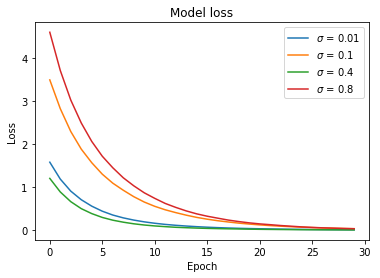

In [42]:
plt.plot(sigma1.history['val_loss'])
plt.plot(sigma2.history['val_loss'])
plt.plot(sigma3.history['val_loss'])
plt.plot(sigma4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['$\sigma$ = 0.01', '$\sigma$ = 0.1','$\sigma$ = 0.4','$\sigma$ = 0.8'], loc='best')
plt.show()

The slopes of these curves vary in a non linear way, we see even with various runs that with little noise the learning process gets slower, the same thing for big noise. but we have that for an intermediate value of noise on our sample the process get's faster.

I tried to make sense (quite euristically) of this behaviour: too much noise makes more difficult to find the rule (it shouldn't happen with larger datasets),
too little noise means that the algoritm has only one choice that minimizes the loss in a drastic way, instead if some noise is present, the unsharpness of the data allows the algorithm to get close to the correct parameters with a smoother decrease of the loss.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [40]:
np.random.seed(0)
x_dataset = np.random.uniform(-1, 1, 300)
x_validdataset = np.random.uniform(-1, 1, 10)
x_validdataset.sort()
y_target = 4 - 3*x_validdataset-2*(x_validdataset**2)+3*(x_validdataset**3)  # ideal (target) linear function

sigma = 0.01 # noise standard deviation, for now we will leave the same noise on every set
y_dataset = np.random.normal( 4 - 3*x_dataset-2*(x_dataset**2)+3*(x_dataset**3) ,40*sigma)
# actual measures from which we want to guess regression parameters
y_valid = np.random.normal( 4 - 3*x_validdataset-2*(x_validdataset**2)+3*(x_validdataset**3) , sigma)

In [13]:
modeltanh = tf.keras.Sequential()
modeltanh.add(Dense(1, input_shape=(1,)))
modeltanh.add(Dense(20,activation='tanh'))
modeltanh.add(Dense(1))
modeltanh.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [14]:
modeltanh.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [15]:
modelth = modeltanh.fit(x=x_dataset, y=y_dataset, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_validdataset, y_valid))


Train on 300 samples, validate on 10 samples
Epoch 1/30
300/300 [==============================] - 0s 772us/sample - loss: 7.8828 - mean_squared_error: 7.8828 - val_loss: 3.1196 - val_mean_squared_error: 3.1196
Epoch 2/30
300/300 [==============================] - 0s 31us/sample - loss: 2.3073 - mean_squared_error: 2.3073 - val_loss: 0.9503 - val_mean_squared_error: 0.9503
Epoch 3/30
300/300 [==============================] - 0s 38us/sample - loss: 0.7250 - mean_squared_error: 0.7250 - val_loss: 0.8333 - val_mean_squared_error: 0.8333
Epoch 4/30
300/300 [==============================] - 0s 38us/sample - loss: 0.5226 - mean_squared_error: 0.5226 - val_loss: 0.9187 - val_mean_squared_error: 0.9187
Epoch 5/30
300/300 [==============================] - 0s 49us/sample - loss: 0.4946 - mean_squared_error: 0.4946 - val_loss: 0.8933 - val_mean_squared_error: 0.8933
Epoch 6/30
300/300 [==============================] - 0s 36us/sample - loss: 0.4907 - mean_squared_error: 0.4907 - val_loss: 0.86

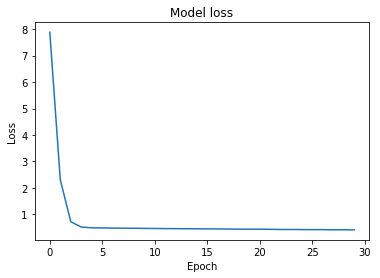

In [16]:
plt.plot(modelth.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

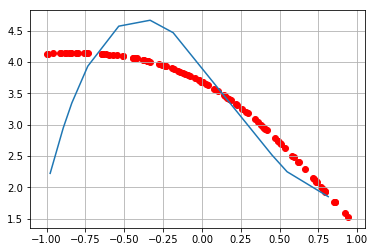

In [17]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = modeltanh.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_validdataset, y_target)
plt.grid(True)
plt.show()

We can notice that the fit isn't linear, we can try adding neurons to see if the NN get's more capable of making curves. we try doubling the neurons in the layer or adding a second layer

In [36]:
modeltanhlarge = tf.keras.Sequential()
modeltanhlarge.add(Dense(1, input_shape=(1,)))
modeltanhlarge.add(Dense(40,activation='tanh'))
modeltanhlarge.add(Dense(1))
modeltanhlarge.compile(optimizer='sgd', loss='mse', metrics=['mse'])

modeltanhdouble = tf.keras.Sequential()
modeltanhdouble.add(Dense(1, input_shape=(1,)))
modeltanhdouble.add(Dense(20,activation='tanh'))
modeltanhdouble.add(Dense(20,activation='tanh'))
modeltanhdouble.add(Dense(1))
modeltanhdouble.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [37]:
modelthl = modeltanhlarge.fit(x=x_dataset, y=y_dataset, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_validdataset, y_valid))

modelthd = modeltanhdouble.fit(x=x_dataset, y=y_dataset, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_validdataset, y_valid))

Train on 500 samples, validate on 20 samples
Epoch 1/30
500/500 [==============================] - 0s 591us/sample - loss: 6.4246 - mean_squared_error: 6.4246 - val_loss: 2.5252 - val_mean_squared_error: 2.5252
Epoch 2/30
500/500 [==============================] - 0s 33us/sample - loss: 1.5440 - mean_squared_error: 1.5440 - val_loss: 1.0652 - val_mean_squared_error: 1.0652
Epoch 3/30
500/500 [==============================] - 0s 44us/sample - loss: 1.0914 - mean_squared_error: 1.0914 - val_loss: 0.9285 - val_mean_squared_error: 0.9285
Epoch 4/30
500/500 [==============================] - 0s 46us/sample - loss: 1.0068 - mean_squared_error: 1.0068 - val_loss: 0.8179 - val_mean_squared_error: 0.8179
Epoch 5/30
500/500 [==============================] - 0s 35us/sample - loss: 0.9143 - mean_squared_error: 0.9143 - val_loss: 0.7316 - val_mean_squared_error: 0.7316
Epoch 6/30
500/500 [==============================] - 0s 35us/sample - loss: 0.8310 - mean_squared_error: 0.8310 - val_loss: 0.63

Epoch 20/30
500/500 [==============================] - 0s 35us/sample - loss: 0.5236 - mean_squared_error: 0.5236 - val_loss: 0.2956 - val_mean_squared_error: 0.2956
Epoch 21/30
500/500 [==============================] - 0s 38us/sample - loss: 0.5245 - mean_squared_error: 0.5245 - val_loss: 0.2920 - val_mean_squared_error: 0.2920
Epoch 22/30
500/500 [==============================] - 0s 38us/sample - loss: 0.5165 - mean_squared_error: 0.5165 - val_loss: 0.2932 - val_mean_squared_error: 0.2932
Epoch 23/30
500/500 [==============================] - 0s 36us/sample - loss: 0.5136 - mean_squared_error: 0.5136 - val_loss: 0.2905 - val_mean_squared_error: 0.2905
Epoch 24/30
500/500 [==============================] - 0s 40us/sample - loss: 0.5088 - mean_squared_error: 0.5088 - val_loss: 0.3228 - val_mean_squared_error: 0.3228
Epoch 25/30
500/500 [==============================] - 0s 39us/sample - loss: 0.5104 - mean_squared_error: 0.5104 - val_loss: 0.2931 - val_mean_squared_error: 0.2931
Epoc

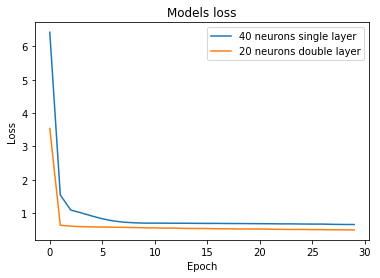

In [38]:
plt.plot(modelthl.history['loss'])
plt.plot(modelthd.history['loss'])
plt.title('Models loss')
plt.legend(['40 neurons single layer','20 neurons double layer'], loc='best')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

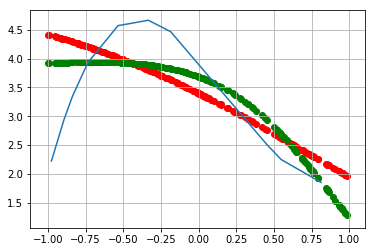

In [41]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predictedl = modeltanhlarge.predict(x_predicted)
y_predictedd = modeltanhdouble.predict(x_predicted)
plt.scatter(x_predicted, y_predictedl,color='r')
plt.scatter(x_predicted, y_predictedd,color='g')
plt.plot(x_validdataset, y_target)
plt.grid(True)
plt.show()

It seems that the capability of the NN to make curved predictions has the best growth in the double layer case. (also the loss is slightly smaller)

Now we try to embetter the fit by getting a larger database. we pick the double layer NN, and we train it on different size of validation data.

In [42]:
modeltanhdouble1 = tf.keras.Sequential()
modeltanhdouble1.add(Dense(1, input_shape=(1,)))
modeltanhdouble1.add(Dense(20,activation='tanh'))
modeltanhdouble1.add(Dense(20,activation='tanh'))
modeltanhdouble1.add(Dense(1))
modeltanhdouble1.compile(optimizer='sgd', loss='mse', metrics=['mse'])

modeltanhdouble2 = tf.keras.Sequential()
modeltanhdouble2.add(Dense(1, input_shape=(1,)))
modeltanhdouble2.add(Dense(20,activation='tanh'))
modeltanhdouble2.add(Dense(20,activation='tanh'))
modeltanhdouble2.add(Dense(1))
modeltanhdouble2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [43]:
np.random.seed(0)
x_dataset = np.random.uniform(-1, 1, 500)
x_validdataset = np.random.uniform(-1, 1, 20)
x_validdataset.sort()
y_target = 4 - 3*x_validdataset-2*(x_validdataset**2)+3*(x_validdataset**3)  # ideal (target) linear function

sigma = 0.01 # noise standard deviation, for now we will leave the same noise on every set
y_dataset = np.random.normal( 4 - 3*x_dataset-2*(x_dataset**2)+3*(x_dataset**3) ,40*sigma)
# actual measures from which we want to guess regression parameters
y_valid = np.random.normal( 4 - 3*x_validdataset-2*(x_validdataset**2)+3*(x_validdataset**3) , sigma)

In [44]:
np.random.seed(0)
x_dataset1 = np.random.uniform(-1, 1, 500)
x_validdataset1 = np.random.uniform(-1, 1, 40)
x_validdataset1.sort()
y_target = 4 - 3*x_validdataset1-2*(x_validdataset1**2)+3*(x_validdataset1**3)  # ideal (target) linear function

sigma = 0.01 # noise standard deviation, for now we will leave the same noise on every set
y_dataset1 = np.random.normal( 4 - 3*x_dataset1-2*(x_dataset1**2)+3*(x_dataset1**3) ,40*sigma)
# actual measures from which we want to guess regression parameters
y_valid1 = np.random.normal( 4 - 3*x_validdataset1-2*(x_validdataset1**2)+3*(x_validdataset1**3) , sigma)

In [45]:
modelthd1 = modeltanhdouble1.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))

modelthd2 = modeltanhdouble2.fit(x=x_dataset1, y=y_dataset1, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset1, y_valid1))

Train on 500 samples, validate on 20 samples
Epoch 1/30
500/500 [==============================] - 0s 848us/sample - loss: 3.9173 - mean_squared_error: 3.9173 - val_loss: 0.9111 - val_mean_squared_error: 0.9111
Epoch 2/30
500/500 [==============================] - 0s 34us/sample - loss: 0.9144 - mean_squared_error: 0.9144 - val_loss: 0.6854 - val_mean_squared_error: 0.6854
Epoch 3/30
500/500 [==============================] - 0s 39us/sample - loss: 0.7539 - mean_squared_error: 0.7539 - val_loss: 0.5200 - val_mean_squared_error: 0.5200
Epoch 4/30
500/500 [==============================] - 0s 44us/sample - loss: 0.6637 - mean_squared_error: 0.6637 - val_loss: 0.4303 - val_mean_squared_error: 0.4303
Epoch 5/30
500/500 [==============================] - 0s 39us/sample - loss: 0.6265 - mean_squared_error: 0.6265 - val_loss: 0.3866 - val_mean_squared_error: 0.3866
Epoch 6/30
500/500 [==============================] - 0s 38us/sample - loss: 0.6080 - mean_squared_error: 0.6080 - val_loss: 0.36

Epoch 20/30
500/500 [==============================] - 0s 38us/sample - loss: 0.3081 - mean_squared_error: 0.3081 - val_loss: 0.2135 - val_mean_squared_error: 0.2135
Epoch 21/30
500/500 [==============================] - 0s 38us/sample - loss: 0.2933 - mean_squared_error: 0.2933 - val_loss: 0.2029 - val_mean_squared_error: 0.2029
Epoch 22/30
500/500 [==============================] - 0s 38us/sample - loss: 0.2827 - mean_squared_error: 0.2827 - val_loss: 0.1814 - val_mean_squared_error: 0.1814
Epoch 23/30
500/500 [==============================] - 0s 37us/sample - loss: 0.2719 - mean_squared_error: 0.2719 - val_loss: 0.1669 - val_mean_squared_error: 0.1669
Epoch 24/30
500/500 [==============================] - 0s 40us/sample - loss: 0.2628 - mean_squared_error: 0.2628 - val_loss: 0.1538 - val_mean_squared_error: 0.1538
Epoch 25/30
500/500 [==============================] - 0s 35us/sample - loss: 0.2532 - mean_squared_error: 0.2532 - val_loss: 0.1397 - val_mean_squared_error: 0.1397
Epoc

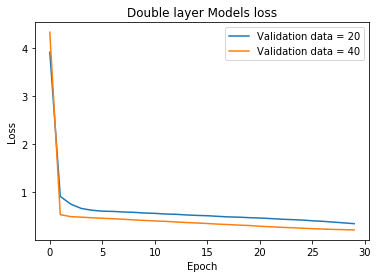

In [46]:
plt.plot(modelthd1.history['loss'])
plt.plot(modelthd2.history['loss'])
plt.title('Double layer Models loss')
plt.legend(['Validation data = 20','Validation data = 40'], loc='best')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()



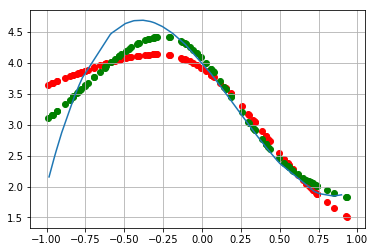

In [47]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predictedd1 = modeltanhdouble1.predict(x_predicted)
y_predictedd2 = modeltanhdouble2.predict(x_predicted)
plt.scatter(x_predicted, y_predictedd1,color='r')
plt.scatter(x_predicted, y_predictedd2,color='g')
plt.plot(x_validdataset1, y_target)
plt.grid(True)
plt.show()

As we could expect, increasing the size of the validation data give us a better training capability.
In the following cells we will explore different combinations of activators, optimaizer and loss function.

In [103]:
np.random.seed(0)
x_dataset = np.random.uniform(-1, 1, 500)
x_validdataset = np.random.uniform(-1, 1, 40)
x_validdataset.sort()
y_target = 4 - 3*x_validdataset-2*(x_validdataset**2)+3*(x_validdataset**3)  # ideal (target) linear function

sigma = 0.01 # noise standard deviation, for now we will leave the same noise on every set
y_dataset = np.random.normal( 4 - 3*x_dataset-2*(x_dataset**2)+3*(x_dataset**3) ,40*sigma)
# actual measures from which we want to guess regression parameters
y_valid = np.random.normal( 4 - 3*x_validdataset-2*(x_validdataset**2)+3*(x_validdataset**3) , sigma)

In [104]:
#we will train 3 groups of NNs, each group is identified by its activation function. 
#the name of the NNs are formed in this way:
# M_<activation>_<optimizer>_<loss>

#4 group are formed with 3 optimizers and 3 loss functions (36 NNs in total)

    ###elu group
    
    
    ##sgd optimizer
    
M_elu_sgd_mse = tf.keras.Sequential()
M_elu_sgd_mse.add(Dense(1, input_shape=(1,)))
M_elu_sgd_mse.add(Dense(20,activation='elu'))
M_elu_sgd_mse.add(Dense(20,activation='elu'))
M_elu_sgd_mse.add(Dense(20,activation='elu'))
M_elu_sgd_mse.add(Dense(1))
M_elu_sgd_mse.compile(optimizer='sgd', loss='mse', metrics=['mse'])

M_elu_sgd_mae = tf.keras.Sequential()
M_elu_sgd_mae.add(Dense(1, input_shape=(1,)))
M_elu_sgd_mae.add(Dense(20,activation='elu'))
M_elu_sgd_mae.add(Dense(20,activation='elu'))
M_elu_sgd_mae.add(Dense(20,activation='elu'))
M_elu_sgd_mae.add(Dense(1))
M_elu_sgd_mae.compile(optimizer='sgd', loss='mae', metrics=['mse'])

M_elu_sgd_lch = tf.keras.Sequential()
M_elu_sgd_lch.add(Dense(1, input_shape=(1,)))
M_elu_sgd_lch.add(Dense(20,activation='elu'))
M_elu_sgd_lch.add(Dense(20,activation='elu'))
M_elu_sgd_lch.add(Dense(20,activation='elu'))
M_elu_sgd_lch.add(Dense(1))
M_elu_sgd_lch.compile(optimizer='sgd', loss='logcosh', metrics=['mse'])


    ##RMSprop optimizer
M_elu_rms_mse = tf.keras.Sequential()
M_elu_rms_mse.add(Dense(1, input_shape=(1,)))
M_elu_rms_mse.add(Dense(20,activation='elu'))
M_elu_rms_mse.add(Dense(20,activation='elu'))
M_elu_rms_mse.add(Dense(20,activation='elu'))
M_elu_rms_mse.add(Dense(1))
M_elu_rms_mse.compile(optimizer='RMSprop', loss='mse', metrics=['mse'])

M_elu_rms_mae = tf.keras.Sequential()
M_elu_rms_mae.add(Dense(1, input_shape=(1,)))
M_elu_rms_mae.add(Dense(20,activation='elu'))
M_elu_rms_mae.add(Dense(20,activation='elu'))
M_elu_rms_mae.add(Dense(20,activation='elu'))
M_elu_rms_mae.add(Dense(1))
M_elu_rms_mae.compile(optimizer='RMSprop', loss='mae', metrics=['mse'])

M_elu_rms_lch = tf.keras.Sequential()
M_elu_rms_lch.add(Dense(1, input_shape=(1,)))
M_elu_rms_lch.add(Dense(20,activation='elu'))
M_elu_rms_lch.add(Dense(20,activation='elu'))
M_elu_rms_lch.add(Dense(20,activation='elu'))
M_elu_rms_lch.add(Dense(1))
M_elu_rms_lch.compile(optimizer='RMSprop', loss='logcosh', metrics=['mse'])



    ##Adadelta optimizer
M_elu_adel_mse = tf.keras.Sequential()
M_elu_adel_mse.add(Dense(1, input_shape=(1,)))
M_elu_adel_mse.add(Dense(20,activation='elu'))
M_elu_adel_mse.add(Dense(20,activation='elu'))
M_elu_adel_mse.add(Dense(20,activation='elu'))
M_elu_adel_mse.add(Dense(1))
M_elu_adel_mse.compile(optimizer='Adadelta', loss='mse', metrics=['mse'])

M_elu_adel_mae = tf.keras.Sequential()
M_elu_adel_mae.add(Dense(1, input_shape=(1,)))
M_elu_adel_mae.add(Dense(20,activation='elu'))
M_elu_adel_mae.add(Dense(20,activation='elu'))
M_elu_adel_mae.add(Dense(20,activation='elu'))
M_elu_adel_mae.add(Dense(1))
M_elu_adel_mae.compile(optimizer='Adadelta', loss='mae', metrics=['mse'])

M_elu_adel_lch = tf.keras.Sequential()
M_elu_adel_lch.add(Dense(1, input_shape=(1,)))
M_elu_adel_lch.add(Dense(20,activation='elu'))
M_elu_adel_lch.add(Dense(20,activation='elu'))
M_elu_adel_lch.add(Dense(20,activation='elu'))
M_elu_adel_lch.add(Dense(1))
M_elu_adel_lch.compile(optimizer='Adadelta', loss='logcosh', metrics=['mse'])


    

In [109]:
###Sigmoid Group

    
    ##sgd optimizer
    
M_sigm_sgd_mse = tf.keras.Sequential()
M_sigm_sgd_mse.add(Dense(1, input_shape=(1,)))
M_sigm_sgd_mse.add(Dense(20,activation='sigmoid'))
M_sigm_sgd_mse.add(Dense(20,activation='sigmoid'))
M_sigm_sgd_mse.add(Dense(20,activation='sigmoid'))
M_sigm_sgd_mse.add(Dense(1))
M_sigm_sgd_mse.compile(optimizer='sgd', loss='mse', metrics=['mse'])

M_sigm_sgd_mae = tf.keras.Sequential()
M_sigm_sgd_mae.add(Dense(1, input_shape=(1,)))
M_sigm_sgd_mae.add(Dense(20,activation='sigmoid'))
M_sigm_sgd_mae.add(Dense(20,activation='sigmoid'))
M_sigm_sgd_mae.add(Dense(20,activation='sigmoid'))
M_sigm_sgd_mae.add(Dense(1))
M_sigm_sgd_mae.compile(optimizer='sgd', loss='mae', metrics=['mse'])

M_sigm_sgd_lch = tf.keras.Sequential()
M_sigm_sgd_lch.add(Dense(1, input_shape=(1,)))
M_sigm_sgd_lch.add(Dense(20,activation='sigmoid'))
M_sigm_sgd_lch.add(Dense(20,activation='sigmoid'))
M_sigm_sgd_lch.add(Dense(20,activation='sigmoid'))
M_sigm_sgd_lch.add(Dense(1))
M_sigm_sgd_lch.compile(optimizer='sgd', loss='logcosh', metrics=['mse'])


    ##RMSprop optimizer
M_sigm_rms_mse = tf.keras.Sequential()
M_sigm_rms_mse.add(Dense(1, input_shape=(1,)))
M_sigm_rms_mse.add(Dense(20,activation='sigmoid'))
M_sigm_rms_mse.add(Dense(20,activation='sigmoid'))
M_sigm_rms_mse.add(Dense(20,activation='sigmoid'))
M_sigm_rms_mse.add(Dense(1))
M_sigm_rms_mse.compile(optimizer='RMSprop', loss='mse', metrics=['mse'])

M_sigm_rms_mae = tf.keras.Sequential()
M_sigm_rms_mae.add(Dense(1, input_shape=(1,)))
M_sigm_rms_mae.add(Dense(20,activation='sigmoid'))
M_sigm_rms_mae.add(Dense(20,activation='sigmoid'))
M_sigm_rms_mae.add(Dense(20,activation='sigmoid'))
M_sigm_rms_mae.add(Dense(1))
M_sigm_rms_mae.compile(optimizer='RMSprop', loss='mae', metrics=['mse'])

M_sigm_rms_lch = tf.keras.Sequential()
M_sigm_rms_lch.add(Dense(1, input_shape=(1,)))
M_sigm_rms_lch.add(Dense(20,activation='sigmoid'))
M_sigm_rms_lch.add(Dense(20,activation='sigmoid'))
M_sigm_rms_lch.add(Dense(20,activation='sigmoid'))
M_sigm_rms_lch.add(Dense(1))
M_sigm_rms_lch.compile(optimizer='RMSprop', loss='logcosh', metrics=['mse'])



    ##Adadelta optimizer
M_sigm_adel_mse = tf.keras.Sequential()
M_sigm_adel_mse.add(Dense(1, input_shape=(1,)))
M_sigm_adel_mse.add(Dense(20,activation='sigmoid'))
M_sigm_adel_mse.add(Dense(20,activation='sigmoid'))
M_sigm_adel_mse.add(Dense(20,activation='sigmoid'))
M_sigm_adel_mse.add(Dense(1))
M_sigm_adel_mse.compile(optimizer='Adadelta', loss='mse', metrics=['mse'])

M_sigm_adel_mae = tf.keras.Sequential()
M_sigm_adel_mae.add(Dense(1, input_shape=(1,)))
M_sigm_adel_mae.add(Dense(20,activation='sigmoid'))
M_sigm_adel_mae.add(Dense(20,activation='sigmoid'))
M_sigm_adel_mae.add(Dense(20,activation='sigmoid'))
M_sigm_adel_mae.add(Dense(1))
M_sigm_adel_mae.compile(optimizer='Adadelta', loss='mae', metrics=['mse'])

M_sigm_adel_lch = tf.keras.Sequential()
M_sigm_adel_lch.add(Dense(1, input_shape=(1,)))
M_sigm_adel_lch.add(Dense(20,activation='sigmoid'))
M_sigm_adel_lch.add(Dense(20,activation='sigmoid'))
M_sigm_adel_lch.add(Dense(20,activation='sigmoid'))
M_sigm_adel_lch.add(Dense(1))
M_sigm_adel_lch.compile(optimizer='Adadelta', loss='logcosh', metrics=['mse'])



In [108]:
 ###SoftMax group

    
    ##sgd optimizer
    
M_sftmax_sgd_mse = tf.keras.Sequential()
M_sftmax_sgd_mse.add(Dense(1, input_shape=(1,)))
M_sftmax_sgd_mse.add(Dense(20,activation='softmax'))
M_sftmax_sgd_mse.add(Dense(20,activation='softmax'))
M_sftmax_sgd_mse.add(Dense(20,activation='softmax'))
M_sftmax_sgd_mse.add(Dense(1))
M_sftmax_sgd_mse.compile(optimizer='sgd', loss='mse', metrics=['mse'])

M_sftmax_sgd_mae = tf.keras.Sequential()
M_sftmax_sgd_mae.add(Dense(1, input_shape=(1,)))
M_sftmax_sgd_mae.add(Dense(20,activation='softmax'))
M_sftmax_sgd_mae.add(Dense(20,activation='softmax'))
M_sftmax_sgd_mae.add(Dense(20,activation='softmax'))
M_sftmax_sgd_mae.add(Dense(1))
M_sftmax_sgd_mae.compile(optimizer='sgd', loss='mae', metrics=['mse'])

M_sftmax_sgd_lch = tf.keras.Sequential()
M_sftmax_sgd_lch.add(Dense(1, input_shape=(1,)))
M_sftmax_sgd_lch.add(Dense(20,activation='softmax'))
M_sftmax_sgd_lch.add(Dense(20,activation='softmax'))
M_sftmax_sgd_lch.add(Dense(20,activation='softmax'))
M_sftmax_sgd_lch.add(Dense(1))
M_sftmax_sgd_lch.compile(optimizer='sgd', loss='logcosh', metrics=['mse'])


    ##RMSprop optimizer
M_sftmax_rms_mse = tf.keras.Sequential()
M_sftmax_rms_mse.add(Dense(1, input_shape=(1,)))
M_sftmax_rms_mse.add(Dense(20,activation='softmax'))
M_sftmax_rms_mse.add(Dense(20,activation='softmax'))
M_sftmax_rms_mse.add(Dense(20,activation='softmax'))
M_sftmax_rms_mse.add(Dense(1))
M_sftmax_rms_mse.compile(optimizer='RMSprop', loss='mse', metrics=['mse'])

M_sftmax_rms_mae = tf.keras.Sequential()
M_sftmax_rms_mae.add(Dense(1, input_shape=(1,)))
M_sftmax_rms_mae.add(Dense(20,activation='softmax'))
M_sftmax_rms_mae.add(Dense(20,activation='softmax'))
M_sftmax_rms_mae.add(Dense(20,activation='softmax'))
M_sftmax_rms_mae.add(Dense(1))
M_sftmax_rms_mae.compile(optimizer='RMSprop', loss='mae', metrics=['mse'])

M_sftmax_rms_lch = tf.keras.Sequential()
M_sftmax_rms_lch.add(Dense(1, input_shape=(1,)))
M_sftmax_rms_lch.add(Dense(20,activation='softmax'))
M_sftmax_rms_lch.add(Dense(20,activation='softmax'))
M_sftmax_rms_lch.add(Dense(20,activation='softmax'))
M_sftmax_rms_lch.add(Dense(1))
M_sftmax_rms_lch.compile(optimizer='RMSprop', loss='logcosh', metrics=['mse'])



    ##Adadelta optimizer
M_sftmax_adel_mse = tf.keras.Sequential()
M_sftmax_adel_mse.add(Dense(1, input_shape=(1,)))
M_sftmax_adel_mse.add(Dense(20,activation='softmax'))
M_sftmax_adel_mse.add(Dense(20,activation='softmax'))
M_sftmax_adel_mse.add(Dense(20,activation='softmax'))
M_sftmax_adel_mse.add(Dense(1))
M_sftmax_adel_mse.compile(optimizer='Adadelta', loss='mse', metrics=['mse'])

M_sftmax_adel_mae = tf.keras.Sequential()
M_sftmax_adel_mae.add(Dense(1, input_shape=(1,)))
M_sftmax_adel_mae.add(Dense(20,activation='softmax'))
M_sftmax_adel_mae.add(Dense(20,activation='softmax'))
M_sftmax_adel_mae.add(Dense(20,activation='softmax'))
M_sftmax_adel_mae.add(Dense(1))
M_sftmax_adel_mae.compile(optimizer='Adadelta', loss='mae', metrics=['mse'])

M_sftmax_adel_lch = tf.keras.Sequential()
M_sftmax_adel_lch.add(Dense(1, input_shape=(1,)))
M_sftmax_adel_lch.add(Dense(20,activation='softmax'))
M_sftmax_adel_lch.add(Dense(20,activation='softmax'))
M_sftmax_adel_lch.add(Dense(20,activation='softmax'))
M_sftmax_adel_lch.add(Dense(1))
M_sftmax_adel_lch.compile(optimizer='Adadelta', loss='logcosh', metrics=['mse'])



In [111]:
 ###Tanh group

    
    ##sgd optimizer
    
M_tanh_sgd_mse = tf.keras.Sequential()
M_tanh_sgd_mse.add(Dense(1, input_shape=(1,)))
M_tanh_sgd_mse.add(Dense(20,activation='tanh'))
M_tanh_sgd_mse.add(Dense(20,activation='tanh'))
M_tanh_sgd_mse.add(Dense(20,activation='tanh'))
M_tanh_sgd_mse.add(Dense(1))
M_tanh_sgd_mse.compile(optimizer='sgd', loss='mse', metrics=['mse'])

M_tanh_sgd_mae = tf.keras.Sequential()
M_tanh_sgd_mae.add(Dense(1, input_shape=(1,)))
M_tanh_sgd_mae.add(Dense(20,activation='tanh'))
M_tanh_sgd_mae.add(Dense(20,activation='tanh'))
M_tanh_sgd_mae.add(Dense(20,activation='tanh'))
M_tanh_sgd_mae.add(Dense(1))
M_tanh_sgd_mae.compile(optimizer='sgd', loss='mae', metrics=['mse'])

M_tanh_sgd_lch = tf.keras.Sequential()
M_tanh_sgd_lch.add(Dense(1, input_shape=(1,)))
M_tanh_sgd_lch.add(Dense(20,activation='tanh'))
M_tanh_sgd_lch.add(Dense(20,activation='tanh'))
M_tanh_sgd_lch.add(Dense(20,activation='tanh'))
M_tanh_sgd_lch.add(Dense(1))
M_tanh_sgd_lch.compile(optimizer='sgd', loss='logcosh', metrics=['mse'])


    ##RMSprop optimizer
M_tanh_rms_mse = tf.keras.Sequential()
M_tanh_rms_mse.add(Dense(1, input_shape=(1,)))
M_tanh_rms_mse.add(Dense(20,activation='tanh'))
M_tanh_rms_mse.add(Dense(20,activation='tanh'))
M_tanh_rms_mse.add(Dense(20,activation='tanh'))
M_tanh_rms_mse.add(Dense(1))
M_tanh_rms_mse.compile(optimizer='RMSprop', loss='mse', metrics=['mse'])

M_tanh_rms_mae = tf.keras.Sequential()
M_tanh_rms_mae.add(Dense(1, input_shape=(1,)))
M_tanh_rms_mae.add(Dense(20,activation='tanh'))
M_tanh_rms_mae.add(Dense(20,activation='tanh'))
M_tanh_rms_mae.add(Dense(20,activation='tanh'))
M_tanh_rms_mae.add(Dense(1))
M_tanh_rms_mae.compile(optimizer='RMSprop', loss='mae', metrics=['mse'])

M_tanh_rms_lch = tf.keras.Sequential()
M_tanh_rms_lch.add(Dense(1, input_shape=(1,)))
M_tanh_rms_lch.add(Dense(20,activation='tanh'))
M_tanh_rms_lch.add(Dense(20,activation='tanh'))
M_tanh_rms_lch.add(Dense(20,activation='tanh'))
M_tanh_rms_lch.add(Dense(1))
M_tanh_rms_lch.compile(optimizer='RMSprop', loss='logcosh', metrics=['mse'])



    ##Adadelta optimizer
M_tanh_adel_mse = tf.keras.Sequential()
M_tanh_adel_mse.add(Dense(1, input_shape=(1,)))
M_tanh_adel_mse.add(Dense(20,activation='tanh'))
M_tanh_adel_mse.add(Dense(20,activation='tanh'))
M_tanh_adel_mse.add(Dense(20,activation='tanh'))
M_tanh_adel_mse.add(Dense(1))
M_tanh_adel_mse.compile(optimizer='Adadelta', loss='mse', metrics=['mse'])

M_tanh_adel_mae = tf.keras.Sequential()
M_tanh_adel_mae.add(Dense(1, input_shape=(1,)))
M_tanh_adel_mae.add(Dense(20,activation='tanh'))
M_tanh_adel_mae.add(Dense(20,activation='tanh'))
M_tanh_adel_mae.add(Dense(20,activation='tanh'))
M_tanh_adel_mae.add(Dense(1))
M_tanh_adel_mae.compile(optimizer='Adadelta', loss='mae', metrics=['mse'])

M_tanh_adel_lch = tf.keras.Sequential()
M_tanh_adel_lch.add(Dense(1, input_shape=(1,)))
M_tanh_adel_lch.add(Dense(20,activation='tanh'))
M_tanh_adel_lch.add(Dense(20,activation='tanh'))
M_tanh_adel_lch.add(Dense(20,activation='tanh'))
M_tanh_adel_lch.add(Dense(1))
M_tanh_adel_lch.compile(optimizer='Adadelta', loss='logcosh', metrics=['mse'])



In [112]:
Melu_sgd_mse = M_elu_sgd_mse.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Melu_sgd_mae =M_elu_sgd_mae.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Melu_sgd_lch =M_elu_sgd_lch.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))

Melu_rms_mse=M_elu_rms_mse.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Melu_rms_mae=M_elu_rms_mae.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Melu_rms_lch=M_elu_rms_lch.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))

Melu_adel_mse=M_elu_adel_mse.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Melu_adel_mae=M_elu_adel_mae.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Melu_adel_lch=M_elu_adel_lch.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))


Train on 500 samples, validate on 40 samples
Epoch 1/30
500/500 [==============================] - 2s 4ms/sample - loss: 3.6616 - mean_squared_error: 3.6616 - val_loss: 0.5331 - val_mean_squared_error: 0.5331
Epoch 2/30
500/500 [==============================] - 0s 160us/sample - loss: 0.5033 - mean_squared_error: 0.5033 - val_loss: 0.5129 - val_mean_squared_error: 0.5129
Epoch 3/30
500/500 [==============================] - 0s 163us/sample - loss: 0.4945 - mean_squared_error: 0.4945 - val_loss: 0.4916 - val_mean_squared_error: 0.4916
Epoch 4/30
500/500 [==============================] - 0s 152us/sample - loss: 0.4808 - mean_squared_error: 0.4808 - val_loss: 0.4740 - val_mean_squared_error: 0.4740
Epoch 5/30
500/500 [==============================] - 0s 164us/sample - loss: 0.4699 - mean_squared_error: 0.4699 - val_loss: 0.4621 - val_mean_squared_error: 0.4621
Epoch 6/30
500/500 [==============================] - 0s 154us/sample - loss: 0.4574 - mean_squared_error: 0.4574 - val_loss: 0

Epoch 20/30
500/500 [==============================] - 0s 133us/sample - loss: 0.4797 - mean_squared_error: 0.4059 - val_loss: 0.4328 - val_mean_squared_error: 0.3996
Epoch 21/30
500/500 [==============================] - 0s 132us/sample - loss: 0.4748 - mean_squared_error: 0.4103 - val_loss: 0.4448 - val_mean_squared_error: 0.3640
Epoch 22/30
500/500 [==============================] - 0s 157us/sample - loss: 0.4683 - mean_squared_error: 0.3934 - val_loss: 0.4148 - val_mean_squared_error: 0.3256
Epoch 23/30
500/500 [==============================] - 0s 159us/sample - loss: 0.4618 - mean_squared_error: 0.3698 - val_loss: 0.4020 - val_mean_squared_error: 0.3124
Epoch 24/30
500/500 [==============================] - 0s 152us/sample - loss: 0.4543 - mean_squared_error: 0.3585 - val_loss: 0.3918 - val_mean_squared_error: 0.2920
Epoch 25/30
500/500 [==============================] - 0s 124us/sample - loss: 0.4468 - mean_squared_error: 0.3449 - val_loss: 0.3761 - val_mean_squared_error: 0.289

Epoch 27/30
500/500 [==============================] - 0s 113us/sample - loss: 0.5009 - mean_squared_error: 0.4492 - val_loss: 0.4705 - val_mean_squared_error: 0.4130
Epoch 28/30
500/500 [==============================] - 0s 103us/sample - loss: 0.4883 - mean_squared_error: 0.4238 - val_loss: 0.4715 - val_mean_squared_error: 0.3820
Epoch 29/30
500/500 [==============================] - 0s 108us/sample - loss: 0.4854 - mean_squared_error: 0.4129 - val_loss: 0.4482 - val_mean_squared_error: 0.3549
Epoch 30/30
500/500 [==============================] - 0s 102us/sample - loss: 0.4786 - mean_squared_error: 0.3957 - val_loss: 0.4253 - val_mean_squared_error: 0.3298
Train on 500 samples, validate on 40 samples
Epoch 1/30
500/500 [==============================] - 2s 4ms/sample - loss: 2.3492 - mean_squared_error: 10.0157 - val_loss: 2.0688 - val_mean_squared_error: 8.2360
Epoch 2/30
500/500 [==============================] - 0s 335us/sample - loss: 1.6541 - mean_squared_error: 6.0301 - val_lo

Epoch 16/30
500/500 [==============================] - 0s 115us/sample - loss: 0.3065 - mean_squared_error: 0.3065 - val_loss: 0.1936 - val_mean_squared_error: 0.1936
Epoch 17/30
500/500 [==============================] - 0s 102us/sample - loss: 0.2894 - mean_squared_error: 0.2894 - val_loss: 0.2210 - val_mean_squared_error: 0.2210
Epoch 18/30
500/500 [==============================] - 0s 110us/sample - loss: 0.2816 - mean_squared_error: 0.2816 - val_loss: 0.1350 - val_mean_squared_error: 0.1350
Epoch 19/30
500/500 [==============================] - 0s 103us/sample - loss: 0.2520 - mean_squared_error: 0.2520 - val_loss: 0.1826 - val_mean_squared_error: 0.1826
Epoch 20/30
500/500 [==============================] - 0s 113us/sample - loss: 0.2604 - mean_squared_error: 0.2604 - val_loss: 0.1085 - val_mean_squared_error: 0.1085
Epoch 21/30
500/500 [==============================] - 0s 115us/sample - loss: 0.2320 - mean_squared_error: 0.2320 - val_loss: 0.1089 - val_mean_squared_error: 0.108

In [116]:
Msigm_sgd_mse = M_sigm_sgd_mse.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Msigm_sgd_mae =M_sigm_sgd_mae.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Msigm_sgd_lch =M_sigm_sgd_lch.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))

Msigm_rms_mse=M_sigm_rms_mse.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Msigm_rms_mae=M_sigm_rms_mae.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Msigm_rms_lch=M_sigm_rms_lch.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))

Msigm_adel_mse=M_sigm_adel_mse.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Msigm_adel_mae=M_sigm_adel_mae.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Msigm_adel_lch=M_sigm_adel_lch.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))


Train on 500 samples, validate on 40 samples
Epoch 1/30
500/500 [==============================] - 0s 251us/sample - loss: 1.1319 - mean_squared_error: 1.1319 - val_loss: 1.0189 - val_mean_squared_error: 1.0189
Epoch 2/30
500/500 [==============================] - 0s 191us/sample - loss: 1.1314 - mean_squared_error: 1.1314 - val_loss: 1.0092 - val_mean_squared_error: 1.0092
Epoch 3/30
500/500 [==============================] - 0s 191us/sample - loss: 1.1381 - mean_squared_error: 1.1381 - val_loss: 1.0280 - val_mean_squared_error: 1.0280
Epoch 4/30
500/500 [==============================] - 0s 162us/sample - loss: 1.1318 - mean_squared_error: 1.1318 - val_loss: 1.0229 - val_mean_squared_error: 1.0229
Epoch 5/30
500/500 [==============================] - 0s 169us/sample - loss: 1.1318 - mean_squared_error: 1.1318 - val_loss: 1.0223 - val_mean_squared_error: 1.0223
Epoch 6/30
500/500 [==============================] - 0s 181us/sample - loss: 1.1344 - mean_squared_error: 1.1344 - val_loss:

Epoch 8/30
500/500 [==============================] - 0s 179us/sample - loss: 0.6546 - mean_squared_error: 0.6546 - val_loss: 0.6283 - val_mean_squared_error: 0.6283
Epoch 9/30
500/500 [==============================] - 0s 183us/sample - loss: 0.6223 - mean_squared_error: 0.6223 - val_loss: 0.6045 - val_mean_squared_error: 0.6045
Epoch 10/30
500/500 [==============================] - 0s 181us/sample - loss: 0.5961 - mean_squared_error: 0.5961 - val_loss: 0.5788 - val_mean_squared_error: 0.5788
Epoch 11/30
500/500 [==============================] - 0s 178us/sample - loss: 0.5695 - mean_squared_error: 0.5695 - val_loss: 0.5595 - val_mean_squared_error: 0.5595
Epoch 12/30
500/500 [==============================] - 0s 157us/sample - loss: 0.5455 - mean_squared_error: 0.5455 - val_loss: 0.5408 - val_mean_squared_error: 0.5408
Epoch 13/30
500/500 [==============================] - 0s 166us/sample - loss: 0.5251 - mean_squared_error: 0.5251 - val_loss: 0.5273 - val_mean_squared_error: 0.5273


Epoch 27/30
500/500 [==============================] - 0s 192us/sample - loss: 0.8739 - mean_squared_error: 0.9999 - val_loss: 0.8516 - val_mean_squared_error: 0.9042
Epoch 28/30
500/500 [==============================] - 0s 168us/sample - loss: 0.8677 - mean_squared_error: 0.9864 - val_loss: 0.8464 - val_mean_squared_error: 0.8924
Epoch 29/30
500/500 [==============================] - 0s 177us/sample - loss: 0.8606 - mean_squared_error: 0.9755 - val_loss: 0.8394 - val_mean_squared_error: 0.8859
Epoch 30/30
500/500 [==============================] - 0s 178us/sample - loss: 0.8536 - mean_squared_error: 0.9559 - val_loss: 0.8326 - val_mean_squared_error: 0.8736
Train on 500 samples, validate on 40 samples
Epoch 1/30
500/500 [==============================] - 0s 456us/sample - loss: 0.2628 - mean_squared_error: 0.6289 - val_loss: 0.2539 - val_mean_squared_error: 0.5960
Epoch 2/30
500/500 [==============================] - 0s 352us/sample - loss: 0.2497 - mean_squared_error: 0.5973 - val_l

Epoch 16/30
500/500 [==============================] - 0s 158us/sample - loss: 0.3881 - mean_squared_error: 0.3881 - val_loss: 0.3712 - val_mean_squared_error: 0.3712
Epoch 17/30
500/500 [==============================] - 0s 175us/sample - loss: 0.3860 - mean_squared_error: 0.3860 - val_loss: 0.3739 - val_mean_squared_error: 0.3739
Epoch 18/30
500/500 [==============================] - 0s 161us/sample - loss: 0.3874 - mean_squared_error: 0.3874 - val_loss: 0.3719 - val_mean_squared_error: 0.3719
Epoch 19/30
500/500 [==============================] - 0s 164us/sample - loss: 0.3862 - mean_squared_error: 0.3862 - val_loss: 0.3731 - val_mean_squared_error: 0.3731
Epoch 20/30
500/500 [==============================] - 0s 170us/sample - loss: 0.3873 - mean_squared_error: 0.3873 - val_loss: 0.3715 - val_mean_squared_error: 0.3715
Epoch 21/30
500/500 [==============================] - 0s 172us/sample - loss: 0.3857 - mean_squared_error: 0.3857 - val_loss: 0.3725 - val_mean_squared_error: 0.372

In [113]:
Msftmax_sgd_mse = M_sftmax_sgd_mse.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Msftmax_sgd_mae =M_sftmax_sgd_mae.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Msftmax_sgd_lch =M_sftmax_sgd_lch.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))

Msftmax_rms_mse=M_sftmax_rms_mse.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Msftmax_rms_mae=M_sftmax_rms_mae.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Msftmax_rms_lch=M_sftmax_rms_lch.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))

Msftmax_adel_mse=M_sftmax_adel_mse.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Msftmax_adel_mae=M_sftmax_adel_mae.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Msftmax_adel_lch=M_sftmax_adel_lch.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))


Train on 500 samples, validate on 40 samples
Epoch 1/30
500/500 [==============================] - 2s 4ms/sample - loss: 9.3880 - mean_squared_error: 9.3880 - val_loss: 7.1513 - val_mean_squared_error: 7.1513
Epoch 2/30
500/500 [==============================] - 0s 908us/sample - loss: 5.3051 - mean_squared_error: 5.3051 - val_loss: 4.2185 - val_mean_squared_error: 4.2185
Epoch 3/30
500/500 [==============================] - 0s 688us/sample - loss: 3.2375 - mean_squared_error: 3.2375 - val_loss: 2.7114 - val_mean_squared_error: 2.7114
Epoch 4/30
500/500 [==============================] - 0s 781us/sample - loss: 2.1967 - mean_squared_error: 2.1967 - val_loss: 1.9297 - val_mean_squared_error: 1.9297
Epoch 5/30
500/500 [==============================] - 0s 757us/sample - loss: 1.6707 - mean_squared_error: 1.6707 - val_loss: 1.5247 - val_mean_squared_error: 1.5247
Epoch 6/30
500/500 [==============================] - 0s 581us/sample - loss: 1.4104 - mean_squared_error: 1.4104 - val_loss: 1

Epoch 20/30
500/500 [==============================] - 0s 726us/sample - loss: 1.0649 - mean_squared_error: 1.6089 - val_loss: 1.0352 - val_mean_squared_error: 1.6005
Epoch 21/30
500/500 [==============================] - 0s 991us/sample - loss: 1.0476 - mean_squared_error: 1.5373 - val_loss: 1.0156 - val_mean_squared_error: 1.5274
Epoch 22/30
500/500 [==============================] - 0s 525us/sample - loss: 1.0336 - mean_squared_error: 1.4758 - val_loss: 0.9994 - val_mean_squared_error: 1.4635
Epoch 23/30
500/500 [==============================] - 0s 675us/sample - loss: 1.0217 - mean_squared_error: 1.4282 - val_loss: 0.9835 - val_mean_squared_error: 1.4042
Epoch 24/30
500/500 [==============================] - 0s 761us/sample - loss: 1.0096 - mean_squared_error: 1.3832 - val_loss: 0.9703 - val_mean_squared_error: 1.3513
Epoch 25/30
500/500 [==============================] - 0s 466us/sample - loss: 0.9985 - mean_squared_error: 1.3411 - val_loss: 0.9611 - val_mean_squared_error: 1.303

Epoch 27/30
500/500 [==============================] - 0s 647us/sample - loss: 2.3689 - mean_squared_error: 6.7464 - val_loss: 2.4605 - val_mean_squared_error: 7.0625
Epoch 28/30
500/500 [==============================] - 0s 653us/sample - loss: 2.3303 - mean_squared_error: 6.5656 - val_loss: 2.4219 - val_mean_squared_error: 6.8738
Epoch 29/30
500/500 [==============================] - 0s 595us/sample - loss: 2.2917 - mean_squared_error: 6.3859 - val_loss: 2.3832 - val_mean_squared_error: 6.6881
Epoch 30/30
500/500 [==============================] - 1s 1ms/sample - loss: 2.2530 - mean_squared_error: 6.2117 - val_loss: 2.3446 - val_mean_squared_error: 6.5054
Train on 500 samples, validate on 40 samples
Epoch 1/30
500/500 [==============================] - 3s 6ms/sample - loss: 2.6080 - mean_squared_error: 11.9812 - val_loss: 2.6898 - val_mean_squared_error: 12.4162
Epoch 2/30
500/500 [==============================] - 0s 534us/sample - loss: 2.5609 - mean_squared_error: 11.6675 - val_lo

Epoch 4/30
500/500 [==============================] - 0s 736us/sample - loss: 2.2943 - mean_squared_error: 9.9713 - val_loss: 2.3703 - val_mean_squared_error: 10.3303
Epoch 5/30
500/500 [==============================] - 0s 620us/sample - loss: 2.2371 - mean_squared_error: 9.6234 - val_loss: 2.3119 - val_mean_squared_error: 9.9692
Epoch 6/30
500/500 [==============================] - 0s 534us/sample - loss: 2.1788 - mean_squared_error: 9.2747 - val_loss: 2.2523 - val_mean_squared_error: 9.6076
Epoch 7/30
500/500 [==============================] - 0s 839us/sample - loss: 2.1195 - mean_squared_error: 8.9263 - val_loss: 2.1916 - val_mean_squared_error: 9.2451
Epoch 8/30
500/500 [==============================] - 0s 606us/sample - loss: 2.0591 - mean_squared_error: 8.5779 - val_loss: 2.1295 - val_mean_squared_error: 8.8816
Epoch 9/30
500/500 [==============================] - 0s 539us/sample - loss: 1.9974 - mean_squared_error: 8.2284 - val_loss: 2.0661 - val_mean_squared_error: 8.5173
Epo

In [114]:
Mtanh_sgd_mse = M_tanh_sgd_mse.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Mtanh_sgd_mae =M_tanh_sgd_mae.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Mtanh_sgd_lch =M_tanh_sgd_lch.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))

Mtanh_rms_mse=M_tanh_rms_mse.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Mtanh_rms_mae=M_tanh_rms_mae.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Mtanh_rms_lch=M_tanh_rms_lch.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))

Mtanh_adel_mse=M_tanh_adel_mse.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Mtanh_adel_mae=M_tanh_adel_mae.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))
Mtanh_adel_lch=M_tanh_adel_lch.fit(x=x_dataset, y=y_dataset, 
            batch_size=32, epochs=30,
            shuffle=True, 
            validation_data=(x_validdataset, y_valid))


Train on 500 samples, validate on 40 samples
Epoch 1/30
500/500 [==============================] - 2s 5ms/sample - loss: 4.2614 - mean_squared_error: 4.2614 - val_loss: 0.8217 - val_mean_squared_error: 0.8217
Epoch 2/30
500/500 [==============================] - 0s 126us/sample - loss: 0.6835 - mean_squared_error: 0.6835 - val_loss: 0.5888 - val_mean_squared_error: 0.5888
Epoch 3/30
500/500 [==============================] - 0s 143us/sample - loss: 0.5582 - mean_squared_error: 0.5582 - val_loss: 0.5492 - val_mean_squared_error: 0.5492
Epoch 4/30
500/500 [==============================] - 0s 145us/sample - loss: 0.5218 - mean_squared_error: 0.5218 - val_loss: 0.5166 - val_mean_squared_error: 0.5166
Epoch 5/30
500/500 [==============================] - 0s 147us/sample - loss: 0.4900 - mean_squared_error: 0.4900 - val_loss: 0.4654 - val_mean_squared_error: 0.4654
Epoch 6/30
500/500 [==============================] - 0s 129us/sample - loss: 0.4520 - mean_squared_error: 0.4520 - val_loss: 0

Epoch 20/30
500/500 [==============================] - 0s 118us/sample - loss: 0.4967 - mean_squared_error: 0.4536 - val_loss: 0.4772 - val_mean_squared_error: 0.4393
Epoch 21/30
500/500 [==============================] - 0s 109us/sample - loss: 0.4957 - mean_squared_error: 0.4507 - val_loss: 0.4625 - val_mean_squared_error: 0.4166
Epoch 22/30
500/500 [==============================] - 0s 100us/sample - loss: 0.4928 - mean_squared_error: 0.4395 - val_loss: 0.4533 - val_mean_squared_error: 0.4074
Epoch 23/30
500/500 [==============================] - 0s 118us/sample - loss: 0.4902 - mean_squared_error: 0.4351 - val_loss: 0.4523 - val_mean_squared_error: 0.4042
Epoch 24/30
500/500 [==============================] - 0s 119us/sample - loss: 0.4868 - mean_squared_error: 0.4294 - val_loss: 0.4409 - val_mean_squared_error: 0.3857
Epoch 25/30
500/500 [==============================] - 0s 117us/sample - loss: 0.4791 - mean_squared_error: 0.4134 - val_loss: 0.4437 - val_mean_squared_error: 0.381

Epoch 27/30
500/500 [==============================] - 0s 142us/sample - loss: 0.3549 - mean_squared_error: 0.2001 - val_loss: 0.1625 - val_mean_squared_error: 0.0514
Epoch 28/30
500/500 [==============================] - 0s 124us/sample - loss: 0.3463 - mean_squared_error: 0.1963 - val_loss: 0.1687 - val_mean_squared_error: 0.0696
Epoch 29/30
500/500 [==============================] - 0s 110us/sample - loss: 0.3459 - mean_squared_error: 0.1945 - val_loss: 0.1426 - val_mean_squared_error: 0.0518
Epoch 30/30
500/500 [==============================] - 0s 125us/sample - loss: 0.3442 - mean_squared_error: 0.1899 - val_loss: 0.1962 - val_mean_squared_error: 0.0668
Train on 500 samples, validate on 40 samples
Epoch 1/30
500/500 [==============================] - 3s 5ms/sample - loss: 2.3860 - mean_squared_error: 10.6676 - val_loss: 2.1981 - val_mean_squared_error: 9.2881
Epoch 2/30
500/500 [==============================] - 0s 238us/sample - loss: 1.7808 - mean_squared_error: 7.0546 - val_lo

Epoch 4/30
500/500 [==============================] - 0s 295us/sample - loss: 0.2206 - mean_squared_error: 0.5695 - val_loss: 0.2242 - val_mean_squared_error: 0.5600
Epoch 5/30
500/500 [==============================] - 0s 698us/sample - loss: 0.2098 - mean_squared_error: 0.5343 - val_loss: 0.2112 - val_mean_squared_error: 0.5384
Epoch 6/30
500/500 [==============================] - 0s 488us/sample - loss: 0.2010 - mean_squared_error: 0.5070 - val_loss: 0.1975 - val_mean_squared_error: 0.4798
Epoch 7/30
500/500 [==============================] - 0s 681us/sample - loss: 0.1966 - mean_squared_error: 0.4841 - val_loss: 0.1821 - val_mean_squared_error: 0.4577
Epoch 8/30
500/500 [==============================] - 0s 455us/sample - loss: 0.1831 - mean_squared_error: 0.4432 - val_loss: 0.1656 - val_mean_squared_error: 0.4149
Epoch 9/30
500/500 [==============================] - 0s 444us/sample - loss: 0.1791 - mean_squared_error: 0.4285 - val_loss: 0.1553 - val_mean_squared_error: 0.3781
Epoc

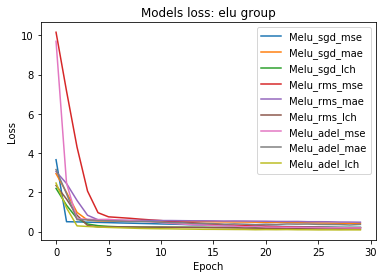

In [117]:
plt.plot(Melu_sgd_mse.history['loss'])
plt.plot(Melu_sgd_mae.history['loss'])
plt.plot(Melu_sgd_lch.history['loss'])
plt.plot(Melu_rms_mse.history['loss'])
plt.plot(Melu_rms_mae.history['loss'])
plt.plot(Melu_rms_lch.history['loss'])
plt.plot(Melu_adel_mse.history['loss'])
plt.plot(Melu_adel_mae.history['loss'])
plt.plot(Melu_adel_lch.history['loss'])

plt.title('Models loss: elu group')
plt.legend(['Melu_sgd_mse','Melu_sgd_mae','Melu_sgd_lch','Melu_rms_mse','Melu_rms_mae','Melu_rms_lch','Melu_adel_mse','Melu_adel_mae','Melu_adel_lch'], loc='best')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

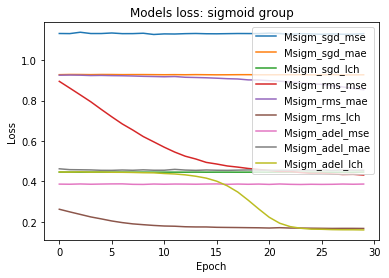

In [118]:
plt.plot(Msigm_sgd_mse.history['loss'])
plt.plot(Msigm_sgd_mae.history['loss'])
plt.plot(Msigm_sgd_lch.history['loss'])
plt.plot(Msigm_rms_mse.history['loss'])
plt.plot(Msigm_rms_mae.history['loss'])
plt.plot(Msigm_rms_lch.history['loss'])
plt.plot(Msigm_adel_mse.history['loss'])
plt.plot(Msigm_adel_mae.history['loss'])
plt.plot(Msigm_adel_lch.history['loss'])

plt.title('Models loss: sigmoid group')
plt.legend(['Msigm_sgd_mse','Msigm_sgd_mae','Msigm_sgd_lch','Msigm_rms_mse','Msigm_rms_mae','Msigm_rms_lch','Msigm_adel_mse','Msigm_adel_mae','Msigm_adel_lch'], loc='best')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

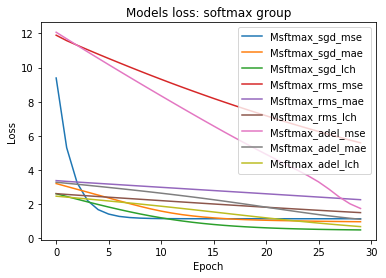

In [119]:
plt.plot(Msftmax_sgd_mse.history['loss'])
plt.plot(Msftmax_sgd_mae.history['loss'])
plt.plot(Msftmax_sgd_lch.history['loss'])
plt.plot(Msftmax_rms_mse.history['loss'])
plt.plot(Msftmax_rms_mae.history['loss'])
plt.plot(Msftmax_rms_lch.history['loss'])
plt.plot(Msftmax_adel_mse.history['loss'])
plt.plot(Msftmax_adel_mae.history['loss'])
plt.plot(Msftmax_adel_lch.history['loss'])

plt.title('Models loss: softmax group')
plt.legend(['Msftmax_sgd_mse','Msftmax_sgd_mae','Msftmax_sgd_lch','Msftmax_rms_mse','Msftmax_rms_mae','Msftmax_rms_lch','Msftmax_adel_mse','Msftmax_adel_mae','Msftmax_adel_lch'], loc='best')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

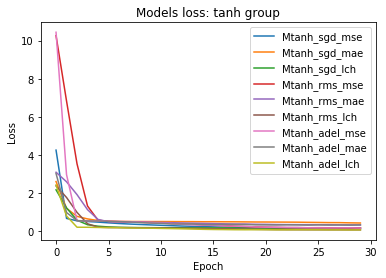

In [120]:
plt.plot(Mtanh_sgd_mse.history['loss'])
plt.plot(Mtanh_sgd_mae.history['loss'])
plt.plot(Mtanh_sgd_lch.history['loss'])
plt.plot(Mtanh_rms_mse.history['loss'])
plt.plot(Mtanh_rms_mae.history['loss'])
plt.plot(Mtanh_rms_lch.history['loss'])
plt.plot(Mtanh_adel_mse.history['loss'])
plt.plot(Mtanh_adel_mae.history['loss'])
plt.plot(Mtanh_adel_lch.history['loss'])

plt.title('Models loss: tanh group')
plt.legend(['Mtanh_sgd_mse','Mtanh_sgd_mae','Mtanh_sgd_lch','Mtanh_rms_mse','Mtanh_rms_mae','Mtanh_rms_lch','Mtanh_adel_mse','Mtanh_adel_mae','Mtanh_adel_lch'], loc='best')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [121]:
x_predicted = np.random.uniform(-1, 1, 100)

y_Melu_sgd_mse=M_elu_sgd_mse.predict(x_predicted)
y_Melu_sgd_mae=M_elu_sgd_mae.predict(x_predicted)
y_Melu_sgd_mae=M_elu_sgd_mae.predict(x_predicted)

y_Melu_rms_mse=M_elu_rms_mse.predict(x_predicted)
y_Melu_rms_mae=M_elu_rms_mae.predict(x_predicted)
y_Melu_rms_lch=M_elu_rms_lch.predict(x_predicted)

y_Melu_adel_mse=M_elu_adel_mse.predict(x_predicted)
y_Melu_adel_mae=M_elu_adel_mae.predict(x_predicted)
y_Melu_adel_lch=M_elu_adel_lch.predict(x_predicted)


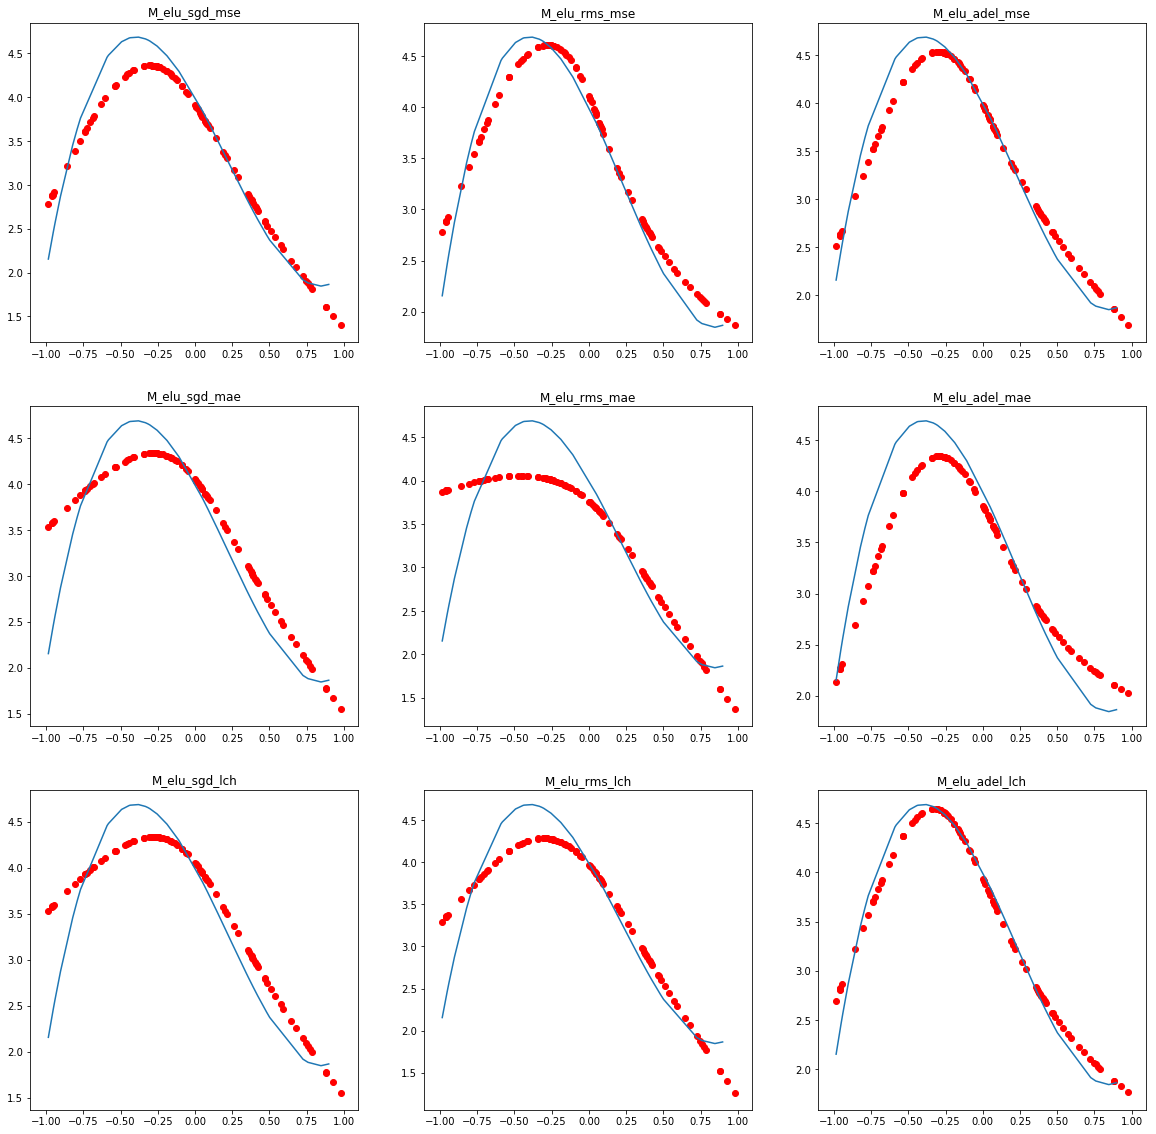

In [122]:
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(20,20)

axes[0,0].plot(x_validdataset1, y_target)
axes[0,0].scatter(x_predicted, y_Melu_sgd_mse ,color='r')
axes[0,0].set_title('M_elu_sgd_mse')

axes[1,0].plot(x_validdataset1, y_target)
axes[1,0].scatter(x_predicted, y_Melu_sgd_mae ,color='r')
axes[1,0].set_title('M_elu_sgd_mae')

axes[2,0].plot(x_validdataset1, y_target)
axes[2,0].scatter(x_predicted, y_Melu_sgd_mae ,color='r')
axes[2,0].set_title('M_elu_sgd_lch')



axes[0,1].plot(x_validdataset1, y_target)
axes[0,1].scatter(x_predicted, y_Melu_rms_mse ,color='r')
axes[0,1].set_title('M_elu_rms_mse')

axes[1,1].plot(x_validdataset1, y_target)
axes[1,1].scatter(x_predicted, y_Melu_rms_mae ,color='r')
axes[1,1].set_title('M_elu_rms_mae')

axes[2,1].plot(x_validdataset1, y_target)
axes[2,1].scatter(x_predicted, y_Melu_rms_lch ,color='r')
axes[2,1].set_title('M_elu_rms_lch')



axes[0,2].plot(x_validdataset1, y_target)
axes[0,2].scatter(x_predicted, y_Melu_adel_mse ,color='r')
axes[0,2].set_title('M_elu_adel_mse')

axes[1,2].plot(x_validdataset1, y_target)
axes[1,2].scatter(x_predicted, y_Melu_adel_mae ,color='r')
axes[1,2].set_title('M_elu_adel_mae')


axes[2,2].plot(x_validdataset1, y_target)
axes[2,2].scatter(x_predicted, y_Melu_adel_lch ,color='r')
axes[2,2].set_title('M_elu_adel_lch')



plt.show()

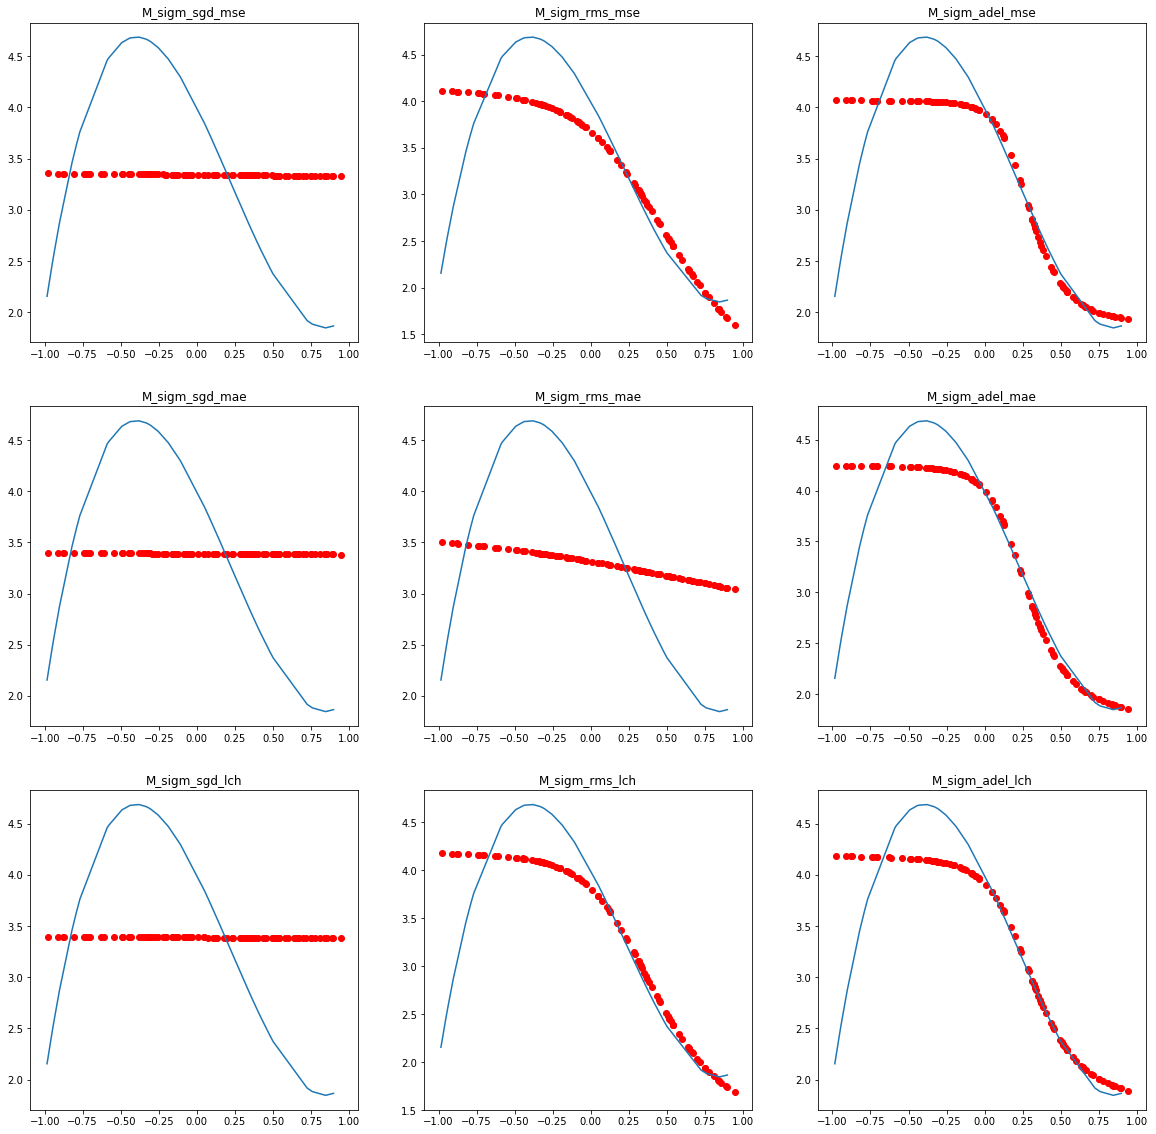

In [123]:
x_predicted = np.random.uniform(-1, 1, 100)

y_Msigm_sgd_mse=M_sigm_sgd_mse.predict(x_predicted)
y_Msigm_sgd_mae=M_sigm_sgd_mae.predict(x_predicted)
y_Msigm_sgd_mae=M_sigm_sgd_mae.predict(x_predicted)

y_Msigm_rms_mse=M_sigm_rms_mse.predict(x_predicted)
y_Msigm_rms_mae=M_sigm_rms_mae.predict(x_predicted)
y_Msigm_rms_lch=M_sigm_rms_lch.predict(x_predicted)

y_Msigm_adel_mse=M_sigm_adel_mse.predict(x_predicted)
y_Msigm_adel_mae=M_sigm_adel_mae.predict(x_predicted)
y_Msigm_adel_lch=M_sigm_adel_lch.predict(x_predicted)


fig, axes = plt.subplots(3, 3)
fig.set_size_inches(20,20)

axes[0,0].plot(x_validdataset1, y_target)
axes[0,0].scatter(x_predicted, y_Msigm_sgd_mse ,color='r')
axes[0,0].set_title('M_sigm_sgd_mse')

axes[1,0].plot(x_validdataset1, y_target)
axes[1,0].scatter(x_predicted, y_Msigm_sgd_mae ,color='r')
axes[1,0].set_title('M_sigm_sgd_mae')

axes[2,0].plot(x_validdataset1, y_target)
axes[2,0].scatter(x_predicted, y_Msigm_sgd_mae ,color='r')
axes[2,0].set_title('M_sigm_sgd_lch')



axes[0,1].plot(x_validdataset1, y_target)
axes[0,1].scatter(x_predicted, y_Msigm_rms_mse ,color='r')
axes[0,1].set_title('M_sigm_rms_mse')

axes[1,1].plot(x_validdataset1, y_target)
axes[1,1].scatter(x_predicted, y_Msigm_rms_mae ,color='r')
axes[1,1].set_title('M_sigm_rms_mae')

axes[2,1].plot(x_validdataset1, y_target)
axes[2,1].scatter(x_predicted, y_Msigm_rms_lch ,color='r')
axes[2,1].set_title('M_sigm_rms_lch')



axes[0,2].plot(x_validdataset1, y_target)
axes[0,2].scatter(x_predicted, y_Msigm_adel_mse ,color='r')
axes[0,2].set_title('M_sigm_adel_mse')

axes[1,2].plot(x_validdataset1, y_target)
axes[1,2].scatter(x_predicted, y_Msigm_adel_mae ,color='r')
axes[1,2].set_title('M_sigm_adel_mae')


axes[2,2].plot(x_validdataset1, y_target)
axes[2,2].scatter(x_predicted, y_Msigm_adel_lch ,color='r')
axes[2,2].set_title('M_sigm_adel_lch')



plt.show()

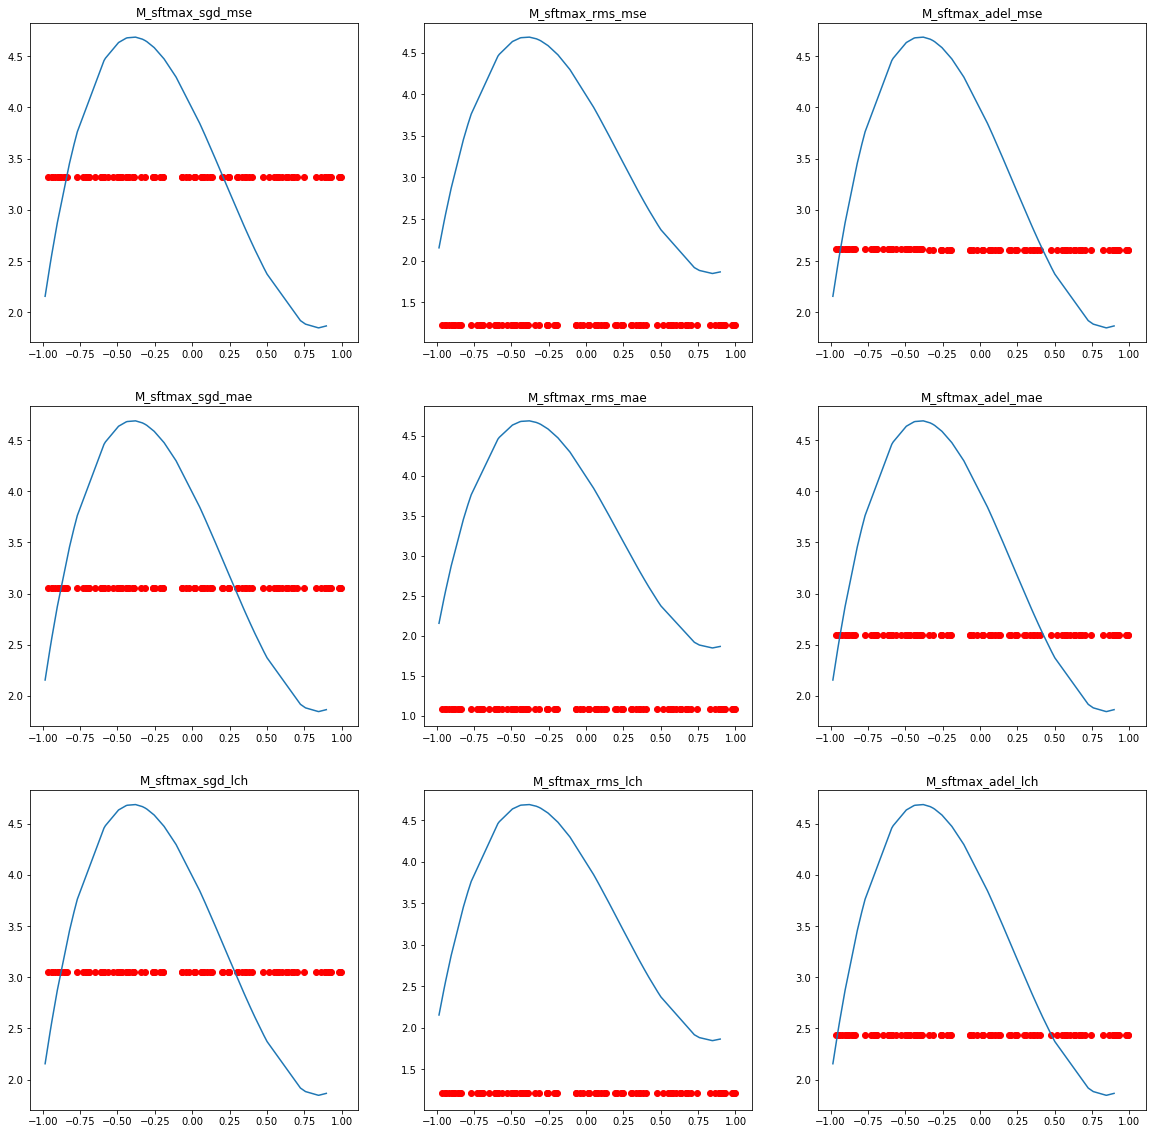

In [124]:
x_predicted = np.random.uniform(-1, 1, 100)

y_Msftmax_sgd_mse=M_sftmax_sgd_mse.predict(x_predicted)
y_Msftmax_sgd_mae=M_sftmax_sgd_mae.predict(x_predicted)
y_Msftmax_sgd_mae=M_sftmax_sgd_mae.predict(x_predicted)

y_Msftmax_rms_mse=M_sftmax_rms_mse.predict(x_predicted)
y_Msftmax_rms_mae=M_sftmax_rms_mae.predict(x_predicted)
y_Msftmax_rms_lch=M_sftmax_rms_lch.predict(x_predicted)

y_Msftmax_adel_mse=M_sftmax_adel_mse.predict(x_predicted)
y_Msftmax_adel_mae=M_sftmax_adel_mae.predict(x_predicted)
y_Msftmax_adel_lch=M_sftmax_adel_lch.predict(x_predicted)


fig, axes = plt.subplots(3, 3)
fig.set_size_inches(20,20)

axes[0,0].plot(x_validdataset1, y_target)
axes[0,0].scatter(x_predicted, y_Msftmax_sgd_mse ,color='r')
axes[0,0].set_title('M_sftmax_sgd_mse')

axes[1,0].plot(x_validdataset1, y_target)
axes[1,0].scatter(x_predicted, y_Msftmax_sgd_mae ,color='r')
axes[1,0].set_title('M_sftmax_sgd_mae')

axes[2,0].plot(x_validdataset1, y_target)
axes[2,0].scatter(x_predicted, y_Msftmax_sgd_mae ,color='r')
axes[2,0].set_title('M_sftmax_sgd_lch')



axes[0,1].plot(x_validdataset1, y_target)
axes[0,1].scatter(x_predicted, y_Msftmax_rms_mse ,color='r')
axes[0,1].set_title('M_sftmax_rms_mse')

axes[1,1].plot(x_validdataset1, y_target)
axes[1,1].scatter(x_predicted, y_Msftmax_rms_mae ,color='r')
axes[1,1].set_title('M_sftmax_rms_mae')

axes[2,1].plot(x_validdataset1, y_target)
axes[2,1].scatter(x_predicted, y_Msftmax_rms_lch ,color='r')
axes[2,1].set_title('M_sftmax_rms_lch')



axes[0,2].plot(x_validdataset1, y_target)
axes[0,2].scatter(x_predicted, y_Msftmax_adel_mse ,color='r')
axes[0,2].set_title('M_sftmax_adel_mse')

axes[1,2].plot(x_validdataset1, y_target)
axes[1,2].scatter(x_predicted, y_Msftmax_adel_mae ,color='r')
axes[1,2].set_title('M_sftmax_adel_mae')


axes[2,2].plot(x_validdataset1, y_target)
axes[2,2].scatter(x_predicted, y_Msftmax_adel_lch ,color='r')
axes[2,2].set_title('M_sftmax_adel_lch')



plt.show()

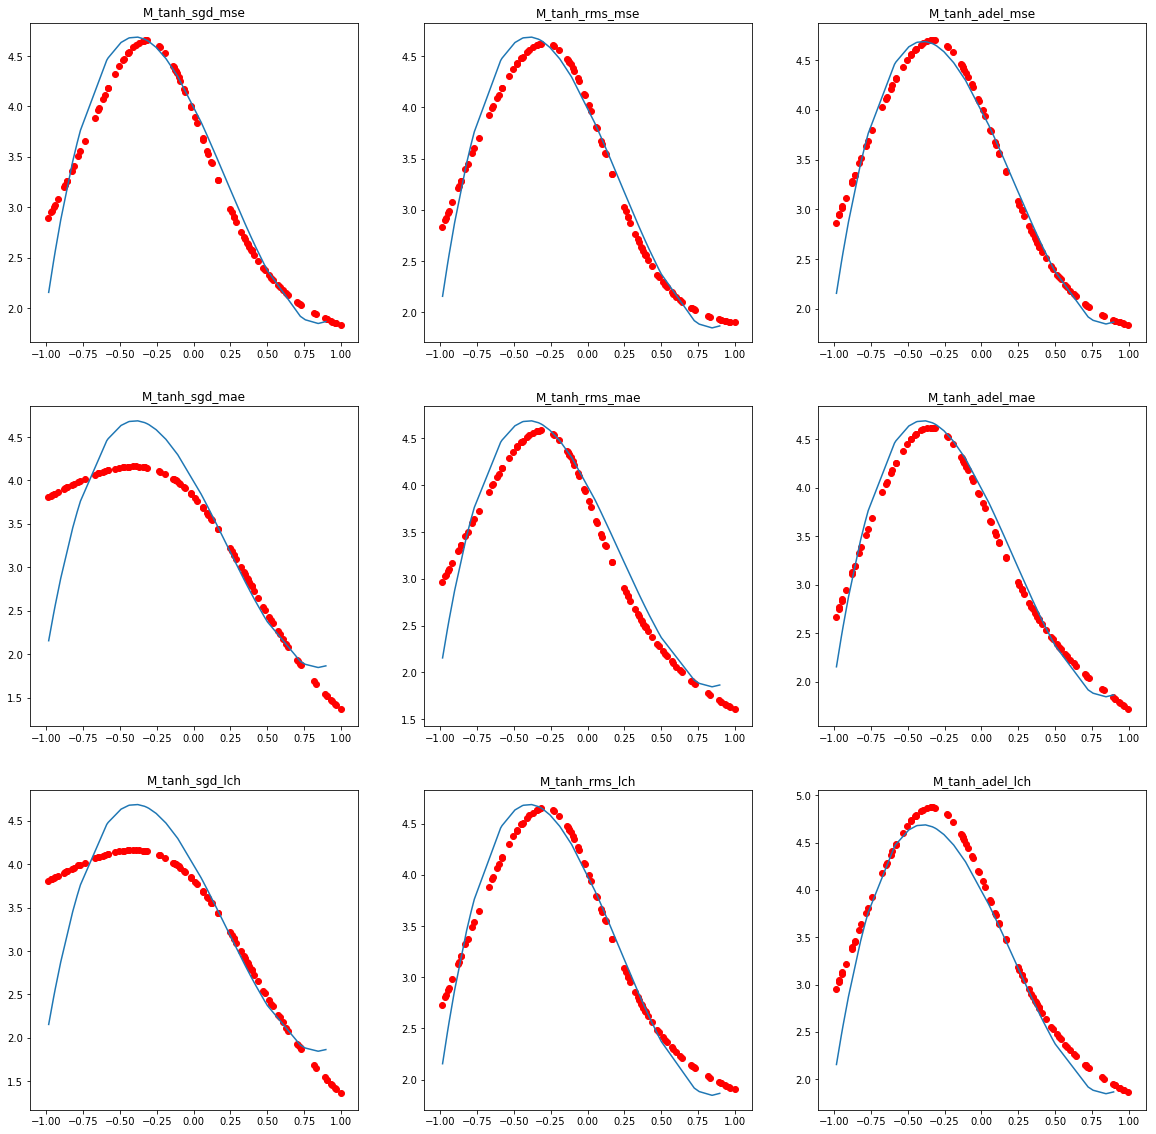

In [125]:
x_predicted = np.random.uniform(-1, 1, 100)

y_Mtanh_sgd_mse=M_tanh_sgd_mse.predict(x_predicted)
y_Mtanh_sgd_mae=M_tanh_sgd_mae.predict(x_predicted)
y_Mtanh_sgd_mae=M_tanh_sgd_mae.predict(x_predicted)

y_Mtanh_rms_mse=M_tanh_rms_mse.predict(x_predicted)
y_Mtanh_rms_mae=M_tanh_rms_mae.predict(x_predicted)
y_Mtanh_rms_lch=M_tanh_rms_lch.predict(x_predicted)

y_Mtanh_adel_mse=M_tanh_adel_mse.predict(x_predicted)
y_Mtanh_adel_mae=M_tanh_adel_mae.predict(x_predicted)
y_Mtanh_adel_lch=M_tanh_adel_lch.predict(x_predicted)


fig, axes = plt.subplots(3, 3)
fig.set_size_inches(20,20)

axes[0,0].plot(x_validdataset1, y_target)
axes[0,0].scatter(x_predicted, y_Mtanh_sgd_mse ,color='r')
axes[0,0].set_title('M_tanh_sgd_mse')

axes[1,0].plot(x_validdataset1, y_target)
axes[1,0].scatter(x_predicted, y_Mtanh_sgd_mae ,color='r')
axes[1,0].set_title('M_tanh_sgd_mae')

axes[2,0].plot(x_validdataset1, y_target)
axes[2,0].scatter(x_predicted, y_Mtanh_sgd_mae ,color='r')
axes[2,0].set_title('M_tanh_sgd_lch')



axes[0,1].plot(x_validdataset1, y_target)
axes[0,1].scatter(x_predicted, y_Mtanh_rms_mse ,color='r')
axes[0,1].set_title('M_tanh_rms_mse')

axes[1,1].plot(x_validdataset1, y_target)
axes[1,1].scatter(x_predicted, y_Mtanh_rms_mae ,color='r')
axes[1,1].set_title('M_tanh_rms_mae')

axes[2,1].plot(x_validdataset1, y_target)
axes[2,1].scatter(x_predicted, y_Mtanh_rms_lch ,color='r')
axes[2,1].set_title('M_tanh_rms_lch')



axes[0,2].plot(x_validdataset1, y_target)
axes[0,2].scatter(x_predicted, y_Mtanh_adel_mse ,color='r')
axes[0,2].set_title('M_tanh_adel_mse')

axes[1,2].plot(x_validdataset1, y_target)
axes[1,2].scatter(x_predicted, y_Mtanh_adel_mae ,color='r')
axes[1,2].set_title('M_tanh_adel_mae')


axes[2,2].plot(x_validdataset1, y_target)
axes[2,2].scatter(x_predicted, y_Mtanh_adel_lch ,color='r')
axes[2,2].set_title('M_tanh_adel_lch')



plt.show()

we take from each grouop the fittest model, and we use it to extend the prediction over the range of training to investigate how the model behaves there.(we exclude the softmax group, for its insufficent fitness..)

We will use:

    M_sigm_adel_mae
    
    M_tanh_adel_mae
    
    M_elu_adel_lch

In [133]:
np.random.seed(0)
x_validdataset = np.random.uniform(-1.5, 1.5, 60)
x_validdataset.sort()
y_valid =  4 - 3*x_validdataset-2*(x_validdataset**2)+3*(x_validdataset**3) 

x_predicted = np.random.uniform(-1.5, 1.5, 400)

y_M_sigm_adel_mae=M_sigm_adel_mae.predict(x_predicted)
y_M_tanh_adel_mae=M_tanh_adel_mae.predict(x_predicted)
y_M_elu_adel_lch=M_elu_adel_lch.predict(x_predicted)

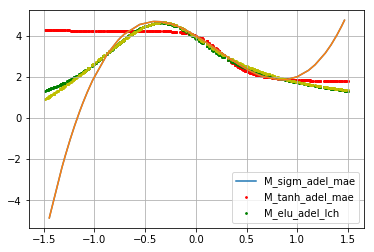

In [140]:

plt.scatter(x_predicted, y_M_sigm_adel_mae,color='r', s=3)
plt.scatter(x_predicted, y_M_tanh_adel_mae,color='g', s=3)
plt.scatter(x_predicted, y_M_elu_adel_lch,color='y', s=3)
plt.legend(['M_sigm_adel_mae','M_tanh_adel_mae','M_elu_adel_lch'])
plt.plot(x_validdataset, y_valid)
plt.grid(True)
plt.show()

As we could expect, even the best models cannot predict accourately outside the range of the validation data.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [170]:
np.random.seed(0)
x_dataset = np.random.uniform(-1.5, 1.5, 20000)
y_dataset = np.random.uniform(-1.5, 1.5, 20000)
_dataset = np.zeros((20000,2))
z_dataset = np.zeros(20000)
sigma=0.2
for i in range(20000):
    _dataset[i,0]=x_dataset[i]
    _dataset[i,1]=y_dataset[i]
    z_dataset[i]=np.sin(x_dataset[i]**2 +y_dataset[i]**2)
    z_dataset[i]=np.random.normal(z_dataset[i],sigma)

    
x_validdataset = np.random.uniform(-1.5, 1.5, 800)
y_validdataset = np.random.uniform(-1.5, 1.5, 800)

z_validdataset= np.zeros(800)
_validdataset = np.zeros((800,2))

for i in range(800):
    _validdataset[i,0]=x_validdataset[i]
    _validdataset[i,1]=y_validdataset[i]
    z_validdataset[i]=np.sin(x_validdataset[i]**2 +y_validdataset[i]**2)



In [171]:
M_tanh_adel_mae2d = tf.keras.Sequential()
M_tanh_adel_mae2d.add(Dense(100, input_shape=(2,), activation='relu'))
#this relu layer was added because the nn had some trouble in fitting an even function,
#the following layers where chosen with tanh activation function because 
#it was found more capable of fitting curved functions.
M_tanh_adel_mae2d.add(Dense(80,activation='tanh'))
M_tanh_adel_mae2d.add(Dense(40,activation='tanh'))
M_tanh_adel_mae2d.add(Dense(20,activation='tanh'))
M_tanh_adel_mae2d.add(Dense(16,activation='tanh'))
M_tanh_adel_mae2d.add(Dense(8,activation='tanh'))
M_tanh_adel_mae2d.add(Dense(1))
M_tanh_adel_mae2d.compile(optimizer='Adadelta', loss='logcosh', metrics=['mae'])

M_tanh_adel_mae2d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 100)               300       
_________________________________________________________________
dense_106 (Dense)            (None, 80)                8080      
_________________________________________________________________
dense_107 (Dense)            (None, 40)                3240      
_________________________________________________________________
dense_108 (Dense)            (None, 20)                820       
_________________________________________________________________
dense_109 (Dense)            (None, 16)                336       
_________________________________________________________________
dense_110 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 9         
Total para

In [172]:
Mtanh_adel_mae2d = M_tanh_adel_mae2d.fit(x=_dataset, y=z_dataset, 
            batch_size=128, epochs=60,
            shuffle=True, 
            validation_data=(_validdataset, z_validdataset))

Train on 20000 samples, validate on 800 samples
Epoch 1/60
20000/20000 [==============================] - 2s 102us/sample - loss: 0.0736 - mean_absolute_error: 0.3014 - val_loss: 0.0530 - val_mean_absolute_error: 0.2546
Epoch 2/60
20000/20000 [==============================] - 1s 47us/sample - loss: 0.0546 - mean_absolute_error: 0.2597 - val_loss: 0.0549 - val_mean_absolute_error: 0.2477
Epoch 3/60
20000/20000 [==============================] - 1s 57us/sample - loss: 0.0336 - mean_absolute_error: 0.2051 - val_loss: 0.0076 - val_mean_absolute_error: 0.0895
Epoch 4/60
20000/20000 [==============================] - 7s 364us/sample - loss: 0.0277 - mean_absolute_error: 0.1879 - val_loss: 0.0067 - val_mean_absolute_error: 0.0900
Epoch 5/60
20000/20000 [==============================] - 1s 47us/sample - loss: 0.0250 - mean_absolute_error: 0.1797 - val_loss: 0.0072 - val_mean_absolute_error: 0.0843
Epoch 6/60
20000/20000 [==============================] - 1s 64us/sample - loss: 0.0234 - mean_

20000/20000 [==============================] - 2s 95us/sample - loss: 0.0206 - mean_absolute_error: 0.1636 - val_loss: 0.0076 - val_mean_absolute_error: 0.0980
Epoch 49/60
20000/20000 [==============================] - 2s 88us/sample - loss: 0.0206 - mean_absolute_error: 0.1634 - val_loss: 0.0020 - val_mean_absolute_error: 0.0400
Epoch 50/60
20000/20000 [==============================] - 2s 91us/sample - loss: 0.0207 - mean_absolute_error: 0.1638 - val_loss: 0.0020 - val_mean_absolute_error: 0.0436
Epoch 51/60
20000/20000 [==============================] - 2s 84us/sample - loss: 0.0206 - mean_absolute_error: 0.1635 - val_loss: 0.0044 - val_mean_absolute_error: 0.0572
Epoch 52/60
20000/20000 [==============================] - 2s 103us/sample - loss: 0.0206 - mean_absolute_error: 0.1638 - val_loss: 0.0029 - val_mean_absolute_error: 0.0471
Epoch 53/60
20000/20000 [==============================] - 2s 101us/sample - loss: 0.0206 - mean_absolute_error: 0.1635 - val_loss: 0.0011 - val_mean_a

In [177]:
x_predicted = np.random.uniform(-1.5, 1.5, 200)
x_predicted.sort()
y_predicted = np.zeros(200)
_predicted= np.ones((200,2))
for i in range(200):
    _predicted[i,:]=np.array((x_predicted[i],y_predicted[i]))
z_Mtanh_adel_mae2d =M_tanh_adel_mae2d.predict(_predicted)

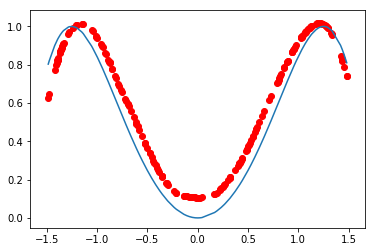

In [178]:
plt.plot(x_predicted,np.sin(x_predicted**2))
plt.scatter(x_predicted,z_Mtanh_adel_mae2d, c='r')
plt.show()

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [12]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

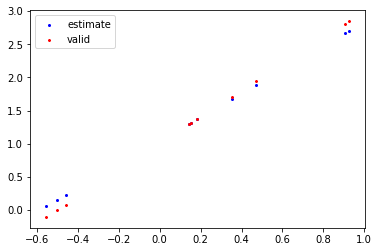

10/10 [==============================] - 0s 21ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0117 - val_mean_squared_error: 0.0117


[array([[1.7890505]], dtype=float32), array([1.0447811], dtype=float32)]

In [15]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()